In [1]:
import pandas as pd
import os
os.chdir(r"C:\Users\Gnaneeswar\Desktop\Praxis\ML Assignment\Rivigo")
os.getcwd()

'C:\\Users\\Gnaneeswar\\Desktop\\Praxis\\ML Assignment\\Rivigo'

In [2]:
xls = pd.ExcelFile('pdc.xlsx')
pickup = pd.read_excel(xls, 'Pickup-Feb-2019-Chennai')

In [4]:
pickup.isnull().sum()

C Note No.                           0
From pincode                         0
To pincode                           0
FROM Branch                          0
To Branch                            0
PRQ No                               0
PICKUP_CREATED_BY                    3
BP/Captain/OA Name                   0
BP Captain Name                   2258
User Type                            0
Created By BP/Captain/OA Name        2
Created By BP Captain Name        2601
Created By User Type                90
Requested Pick Time (PRQ)            0
Pick up Reached Time               767
First Scan Location Code           117
First OU in Time                     0
Lat long at Reached               3326
Device used for Reached           3179
CN Creation Date & Time              0
CN Booking Date & Time               0
Lat long at CN creation           2203
Device used for CN creation       2198
Client Name                          0
Client Code                          0
ORIGIN                   

In [5]:
# filling missing values of consignor name with data from consigner_address
cnmiss=pickup[pickup.consignor_name.isnull()].index
pickup.loc[cnmiss,"consignor_name"]=pickup.loc[cnmiss,"consigner_address"].str.split(".", n = 1, expand = True)[0]

In [6]:
# filling missing values of BP Captain name with data from BP/Captain/OA name

capnmiss=pickup[pickup["BP Captain Name"].isnull()]["BP Captain Name"].index
pickup.loc[capnmiss,"BP Captain Name"] = pickup.loc[capnmiss,"BP/Captain/OA Name"]

In [7]:
# Dropping Columns Created by BP/Captain/OA Name, Created by BP Captain Name, Created by User Type because repeated columns

pickup.drop(columns =["Created By BP/Captain/OA Name","Created By BP Captain Name","Created By User Type"], inplace = True)

In [8]:
# Dropping Columns Charged weight and other because of not knowing how to use data

pickup.drop(columns =["CHARGED_WEIGHT","Device used for CN creation","Device used for Reached","Lat long at CN creation","Lat long at Reached "], inplace = True)


In [9]:
# under standing what is autogenrated pickup
pickup[pickup["Pick up Reached Time"].isnull()].loc[:,["PRQ No","PICKUP_CREATED_BY","Requested Pick Time (PRQ)","Pick up Reached Time","First OU in Time"]].head()


,PRQ No,PICKUP_CREATED_BY,Requested Pick Time (PRQ),Pick up Reached Time,First OU in Time
51,No Pickup,AUTO GENERATED,2019-02-01 12:25,NaN,2019-02-01 12:25:26.8070
52,No Pickup,AUTO GENERATED,2019-02-01 12:28,NaN,2019-02-01 12:28:25.3490
53,No Pickup,AUTO GENERATED,2019-02-01 12:30,NaN,2019-02-01 12:30:55.6110
54,No Pickup,AUTO GENERATED,2019-02-01 12:33,NaN,2019-02-01 12:33:24.1930
55,No Pickup,AUTO GENERATED,2019-02-01 12:34,NaN,2019-02-01 12:34:36.9420


In [10]:
pickup.to_csv('pickup_edit1.csv')
pickup_r= pd.read_csv('pickup_edit1.csv')

In [11]:

# creating a list containing unnique prs numbers
unique_prs=pickup_r[~pickup_r['PRS_NO'].isnull()]['PRS_NO'].unique()
index_list=[]
total_weight=0
pickup_r['PRS_totalweight']=0

# calculating PRS Total Weight

j=0
while j<len(unique_prs):
 index_list= pickup_r[pickup_r.PRS_NO==unique_prs[j]].index
 total_weight= float(pickup_r.loc[index_list,['ACTUAL_WEIGHT']].sum())
 pickup_r.loc[index_list,['PRS_totalweight']]=total_weight
 j=j+1


In [12]:
#saving into new file 

pickup_r.to_csv('pickup_edit4.csv')
pickup_rr= pd.read_csv('pickup_edit4.csv')

In [13]:
# converting PRS NO from float to integer
#pickup_rr.PRS_NO[~pickup_rr.PRS_NO.isnull()]=pickup_rr.PRS_NO[~pickup_rr.PRS_NO.isnull()].astype(int)

In [14]:
# trying to plot histogram of PRS_totalweight
import matplotlib.pyplot as plt

#plt.hist(pickup_rr[['PRS_totalweight','PRS_NO']].groupby('PRS_NO').max())

pickup_rr[['PRS_totalweight','PRS_NO']].groupby('PRS_NO').describe().head()

PRS_totalweight                                                    \
                   count     mean           std      min      25%      50%   
PRS_NO                                                                       
588301.0             8.0  5813.35  9.722907e-13  5813.35  5813.35  5813.35   
588317.0            30.0  1976.00  0.000000e+00  1976.00  1976.00  1976.00   
588447.0             3.0   540.00  0.000000e+00   540.00   540.00   540.00   
588449.0             1.0   198.34           NaN   198.34   198.34   198.34   
588453.0            14.0   751.00  0.000000e+00   751.00   751.00   751.00   

                            
              75%      max  
PRS_NO                      
588301.0  5813.35  5813.35  
588317.0  1976.00  1976.00  
588447.0   540.00   540.00  
588449.0   198.34   198.34  
588453.0   751.00   751.00

In [15]:
#finding count of values above 75 % of PRS_totalweight

pickup_rr[pickup_rr.PRS_totalweight>2507]['PRS_totalweight'].count()

5783

In [16]:
#imputing vehicle type for each PRS No based on total weight
"""
aldost=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight<=1000].index
bolero=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>1000] [pickup_rr.PRS_totalweight<=1500].index
tata407=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>1500] [pickup_rr.PRS_totalweight<=2500].index
canter14=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>2500] [pickup_rr.PRS_totalweight<=3000].index
ft20=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>3000] [pickup_rr.PRS_totalweight<=4000].index
ft24=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>4000].index

pickup_rr.loc[tata407,"VEHICLE_TYPE"]="TATA_407"
pickup_rr.loc[canter14,"VEHICLE_TYPE"]="CANTER_14FT"
pickup_rr.loc[ft20,"VEHICLE_TYPE"]="FT20"
pickup_rr.loc[ft24,"VEHICLE_TYPE"]="FT24"
pickup_rr.loc[aldost,"VEHICLE_TYPE"]="AL_DOST"
pickup_rr.loc[bolero,"VEHICLE_TYPE"]="BOLERO"

pickup_rr.VEHICLE_TYPE.isnull().sum()
"""


'\naldost=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight<=1000].index\nbolero=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>1000] [pickup_rr.PRS_totalweight<=1500].index\ntata407=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>1500] [pickup_rr.PRS_totalweight<=2500].index\ncanter14=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>2500] [pickup_rr.PRS_totalweight<=3000].index\nft20=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>3000] [pickup_rr.PRS_totalweight<=4000].index\nft24=pickup_rr.PRS_totalweight[pickup_rr.PRS_totalweight>4000].index\n\npickup_rr.loc[tata407,"VEHICLE_TYPE"]="TATA_407"\npickup_rr.loc[canter14,"VEHICLE_TYPE"]="CANTER_14FT"\npickup_rr.loc[ft20,"VEHICLE_TYPE"]="FT20"\npickup_rr.loc[ft24,"VEHICLE_TYPE"]="FT24"\npickup_rr.loc[aldost,"VEHICLE_TYPE"]="AL_DOST"\npickup_rr.loc[bolero,"VEHICLE_TYPE"]="BOLERO"\n\npickup_rr.VEHICLE_TYPE.isnull().sum()\n'

In [17]:
# Starting Data Exploration 
pickup_rr.loc[:,["From pincode","To pincode","ORIGIN","DESTINATION"]].head(2)

#NUmber of Unique pickup vechicle numbers
len(pickup["VEHICLE_NUMBER"].unique())

367

In [18]:
# Reading PPM (insurance claimed) and DEPS cases(damage reported, yet to be claimed). If DEPS is confirmed, it will be moven to ppm

xls1 = pd.ExcelFile('fpc.xlsx')
ppm = pd.read_excel(xls1, 'PPM cases')
deps = pd.read_excel(xls1, 'DEPS CN')

In [19]:
ppm.columns

Index(['CN', 'Client Name', 'Booking Date', 'Total No. of boxes', 'Source OU',
       'Destination OU', 'CPD', 'ADD', 'Source for DEPS reporting',
       'POD check/CE escalation date ', '#Affected boxes',
       '#Affected boxes(ppm Contribution level)', 'DEPS type', 'POD remark',
       'Current Status', 'Zoom ppm', 'Cluster ppm', 'Final Resolution',
       'Responsible Type', 'DEPSattributedto(ResponsibleOU)', 'Resp. Cluster',
       'Bucketing', 'Responsible person', 'DEPS Reason', 'DEPS Sub_Reason',
       'Decision in DP call', 'Type of material', 'Type of packaging',
       'week No.'],
      dtype='object')

In [20]:
deps.columns

Index(['Date', 'CN', 'Client', 'From OU', 'TO OU', 'DEPS Type',
       'POD remarks/Escalation', '#Affected boxes', 'Attributed OU',
       'Attributed Cluster', 'Responsible OU (ppm finalized)',
       'Responsible Cluster (ppm finalized)', 'Responsible Type',
       'Responsible Person', 'Claim Status ', 'Bucketing', 'DEPS Reason',
       'DEPS Sub_Reason', 'Type of material', 'Type of packaging',
       'Vehicle-Route Type', 'Vehicle type', 'Reassign to Cluster', 'Remarks',
       'Status (by DP Champ)', 'Actual Status(By Damage Desk)', 'Week No.',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [21]:
# store only those rows that is related to MAA Cluster. #excel 163 rows present for ppm

ppm_m=ppm[(ppm['Source OU'].str.startswith('M', na=False)) | (ppm['Destination OU'].str.startswith('M', na=False))]

deps_m=deps[(deps['From OU'].str.startswith('M', na=False)) | (deps['TO OU'].str.startswith('M', na=False))]

In [22]:
# retain only those columns that are relevant 

ppm_m=ppm_m.loc[:,['CN','DEPS type','Bucketing','Responsible person','DEPS Reason','DEPS Sub_Reason','Type of material','Type of packaging']]

deps_m=deps_m.loc[:,['CN','DEPS Type','Bucketing','Responsible Person','DEPS Reason','DEPS Sub_Reason','Type of material','Type of packaging']]

In [23]:
# include damage yes or no column
ppm_m['damage']=1
deps_m['damage']=0

ppm_m.columns = [x.lower() for x in ppm_m.columns]
ppm_m.columns = [x.strip() for x in ppm_m.columns]

deps_m.columns = [x.lower() for x in deps_m.columns]
deps_m.columns = [x.strip() for x in deps_m.columns]


In [24]:
# lets merge deps and ppm cases.
deps_merge=pd.merge(deps_m,ppm_m, how='outer', on=['cn'])


In [25]:
# lower casing and stripping columns of spaces in Deps Merge
deps_merge.columns

Index(['cn', 'deps type_x', 'bucketing_x', 'responsible person_x',
       'deps reason_x', 'deps sub_reason_x', 'type of material_x',
       'type of packaging_x', 'damage_x', 'deps type_y', 'bucketing_y',
       'responsible person_y', 'deps reason_y', 'deps sub_reason_y',
       'type of material_y', 'type of packaging_y', 'damage_y'],
      dtype='object')

In [26]:
# find index of columns where damage == 1
index=deps_merge[deps_merge['damage_y']==1].index.astype(int)
index=index.tolist()


In [27]:
# now consolidate the deps_merge data frame

for i in index:
    for j in range(1,9):
        deps_merge.loc[i,deps_merge.columns[j]] = deps_merge.loc[i,deps_merge.columns[j+8]]

In [28]:
# now rename the columns and delete redundant columns
deps_merge.drop(columns =[ 'deps type_y', 'bucketing_y','responsible person_y', 'deps reason_y', 'deps sub_reason_y','type of material_y', 'type of packaging_y', 'damage_y'], inplace = True)


In [29]:
#now rename the columns and 

deps_merge.columns = [x.strip('_x') for x in deps_merge.columns]
deps_merge.head()


,cn,deps type,bucketing,responsible person,deps reason,deps sub_reason,type of material,type of packaging,damage
0,8000290312,Damage,LH_In_transit,Dhamodharan,SOP_Not_Followed,Light_Over_heavy_not_followed,industrial goods,carton,0.0
1,1002802219,0,Last_Mile,NaN,Small_tampering,No_Claim,chemicals,carton,0.0
2,1002876018,Damage,Last_Mile,Hemanth Kumar,SOP_Not_Followed,Damage_due_to_sharp_edge&odd_dimension_shipment,industrial goods,carton,0.0
3,1002771709,Damage,Last_Mile,K SANJEEV KUMAR,Small_tampering,No_Claim,packing material,carton,0.0
4,2000722972,Damage,LH_In_transit,r adithyan,SOP_Not_Followed,Light_Over_heavy_not_followed,industrial goods,carton,0.0


In [30]:
# saving into a csv file
deps_merge.to_csv('depsmergefinal.csv')

depsmerge_r=pd.read_csv('depsmergefinal.csv')

In [31]:
pickup_merge=pd.merge(pickup_rr,depsmerge_r, how='left', left_on='C Note No.', right_on='cn')

In [32]:
# saving merged pickup file to csv

pickup_merge.drop(columns =['Unnamed: 0_x', 'Unnamed: 0.1','Unnamed: 0_y'], inplace = True)
pickup_merge.columns=[x.lower() for x in pickup_merge.columns]
pickup_merge.columns= [x.strip() for x in pickup_merge.columns]
pickup_merge.to_csv('pickup_mergefin2.csv')

In [33]:
import pandas as pd 
import os
os.chdir(r"C:\Users\Gnaneeswar\Desktop\Praxis\ML Assignment\Rivigo")
os.getcwd()
import matplotlib.pyplot as plt

pickup_merge=pd.read_csv('pickup_mergefin2.csv')
pickup_merge.columns

Index(['Unnamed: 0', 'c note no.', 'from pincode', 'to pincode', 'from branch',
       'to branch', 'prq no', 'pickup_created_by', 'bp/captain/oa name',
       'bp captain name', 'user type', 'requested pick time (prq)',
       'pick up reached time', 'first scan location code', 'first ou in time',
       'cn creation date & time', 'cn booking date & time', 'client name',
       'client code', 'origin', 'destination', 'actual_weight',
       'vehicle_number', 'vehicle_type', 'prs_no', 'consignor_name',
       'consignee_name', 'consigner_address', 'consignee_address', 'date',
       'prs_totalweight', 'cn', 'deps type', 'bucketing', 'responsible person',
       'deps reason', 'deps sub_reason', 'type of material',
       'type of packaging', 'damage'],
      dtype='object')

In [34]:
# creating a copy from master
pickup_merge1=pickup_merge.copy()

## starting data exploration


In [35]:
# Histogram of c notes, total weights, actual weights
# plot count of cnotes by client
# plot total and average weight per consignment by each client
# Bargraph of count of cns from a branch
# Bargraph of count of cns notes by date
# plot 4 weekly line over one another of cnotes count by date to see if there is any weekly cylce
# plot histogram of weight of materials in a PRS
# Plot histogram of 


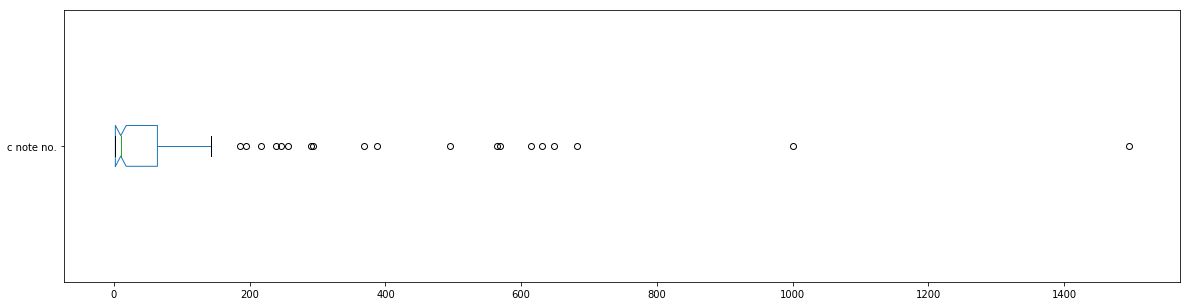

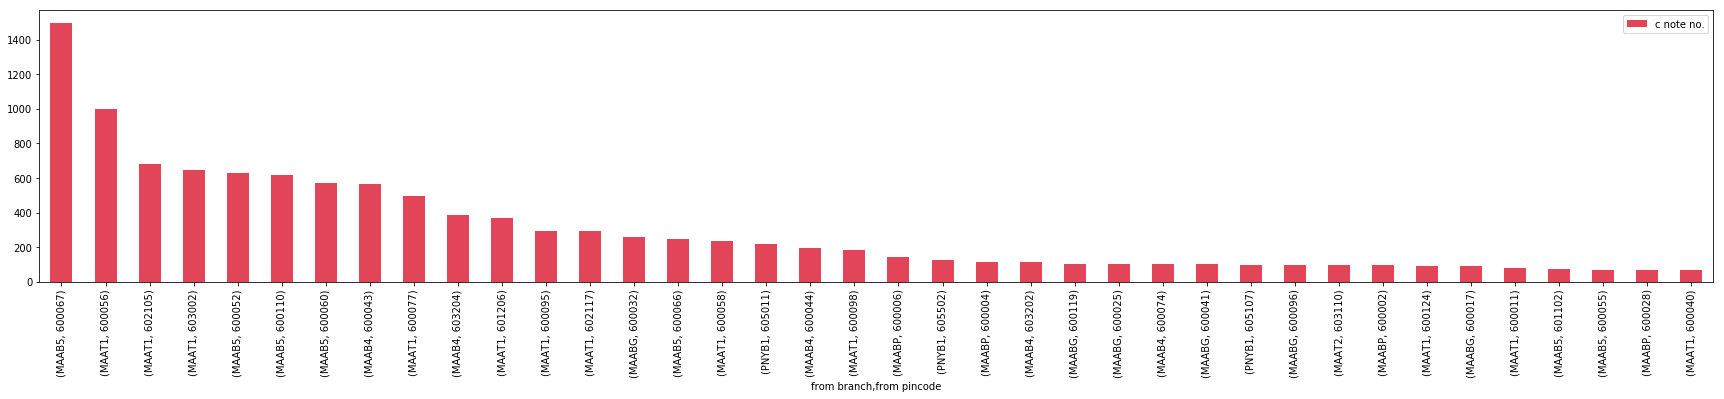

[600067, 600056, 602105, 603002, 600052]

In [36]:
# how many pickups orginating from a pincode and branch. Plot a bar chart of 75th percentile and above data

import matplotlib.pyplot as plt
df1=pickup_merge1.groupby(['from branch','from pincode']).count()['c note no.'].sort_values(ascending=False)
df1=df1.to_frame(name=None)
# df1.rename(columns={'c note no.': 'grouped_pincodes'}, inplace=True) # renaming the columns
df1.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
df1[df1['c note no.']>=64].plot(kind='bar',color='#e34558',figsize=(30,5))
plt.show()


df1.describe()

top5_pin=[]

for i in range(0,5):
    
    top5_pin.append(df1.index[i][1])

top5_pin

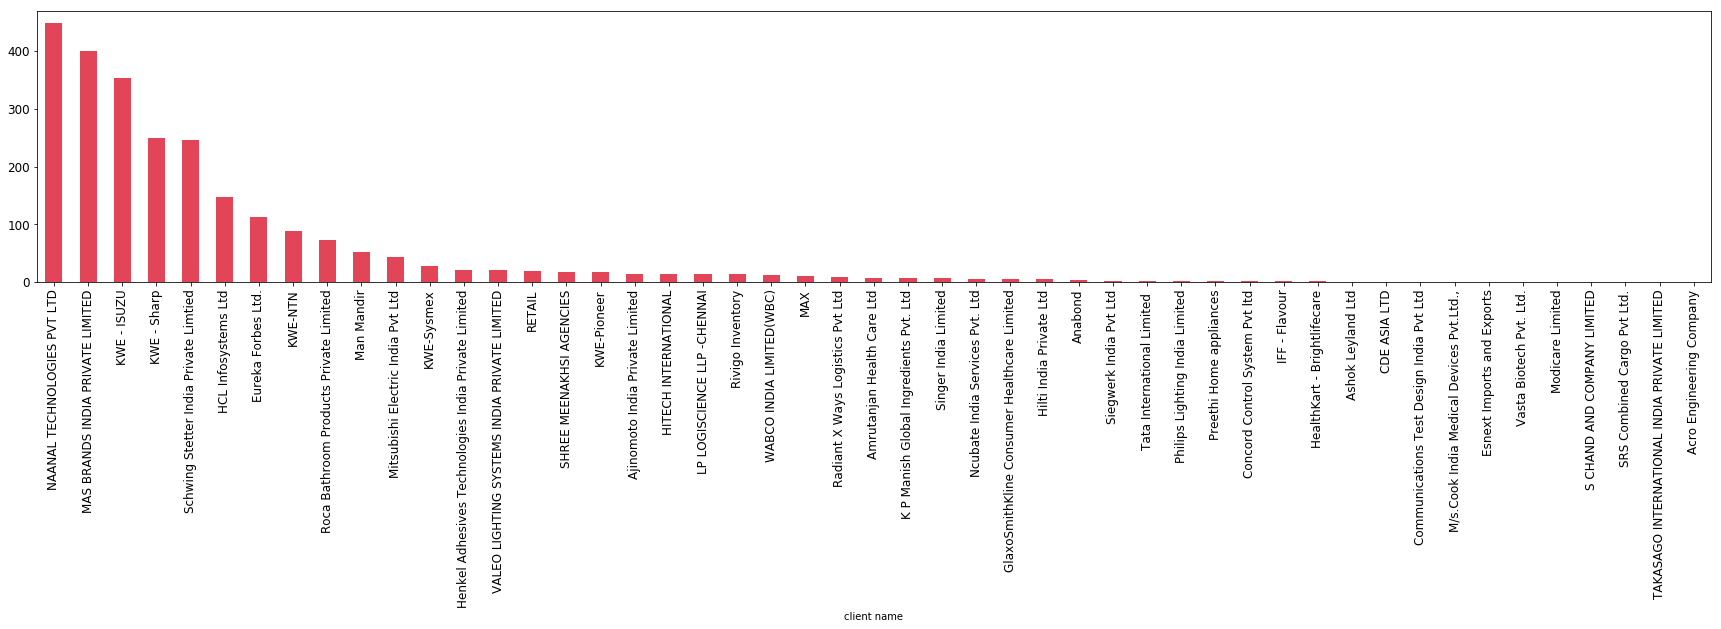

In [37]:
# client vs count of consignments in that highest contribution pincodes

df2=pickup_merge1[(pickup_merge1['from pincode']==600067) | (pickup_merge1['from pincode']==600056)].groupby('client name').count()['c note no.'].sort_values(ascending=False)
df2.plot(kind="bar",figsize=(30,5),color='#e34558',fontsize=12)

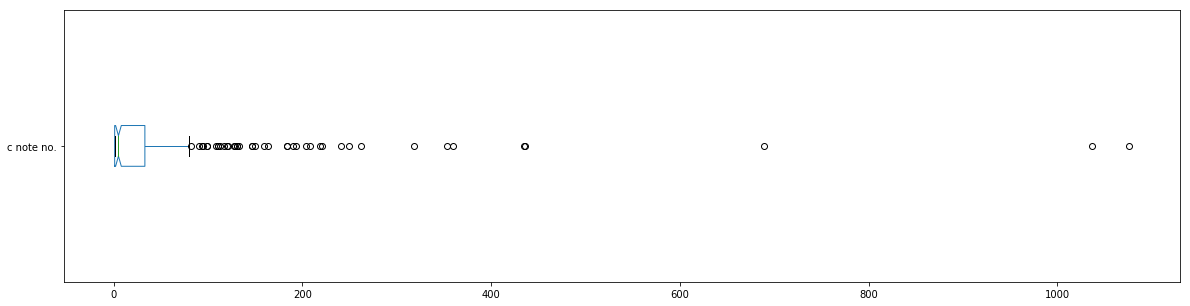

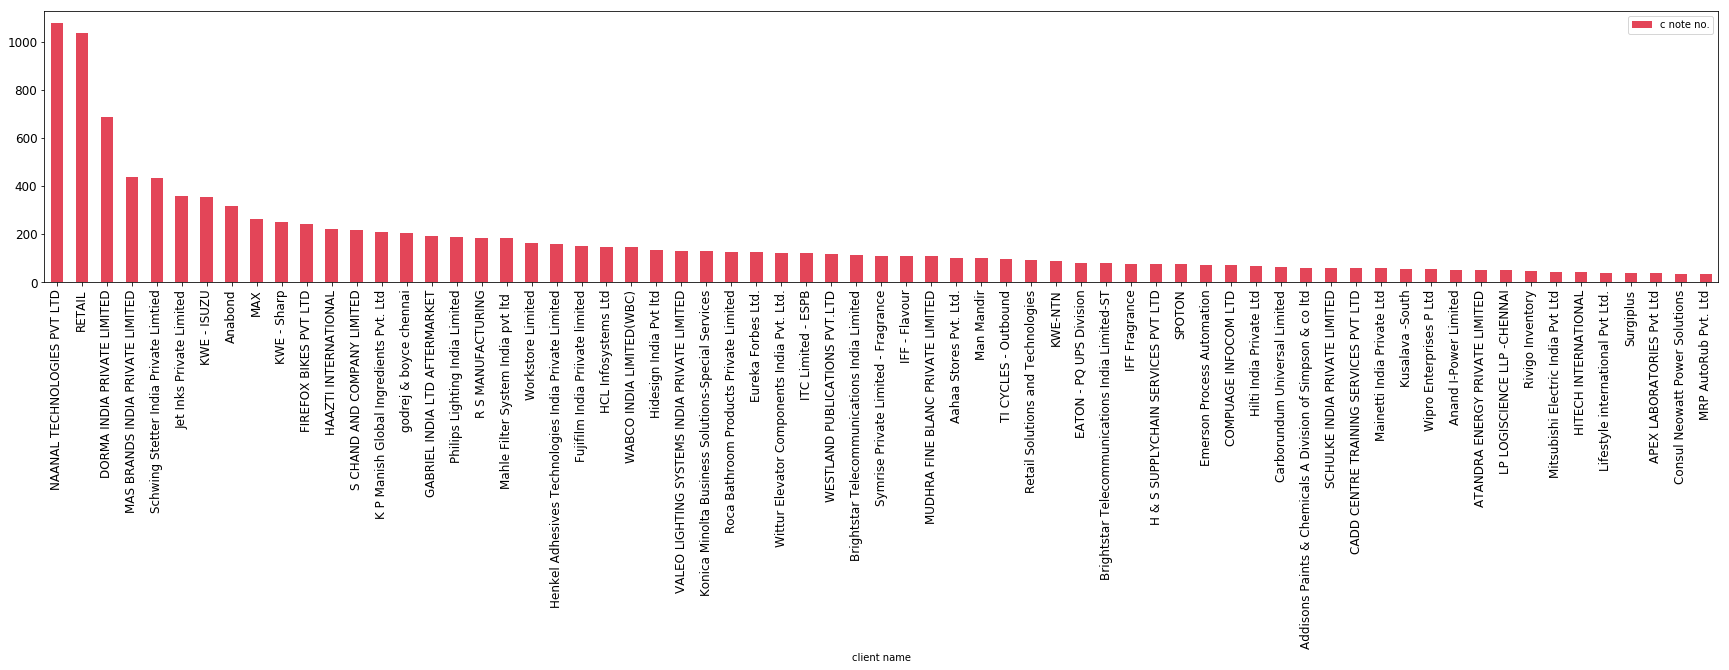

In [38]:
# boxplot of total consignment counts grouped by client 

df3=pickup_merge1.groupby('client name').count()['c note no.'].sort_values(ascending=False)
df3=df3.to_frame(name=None)
df3.describe()

df3.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
df3[df3['c note no.']>33].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()


In [39]:
# how unique are client names
for i in pickup_merge1['client name'].sort_values().unique():
    print(i)


 Orient Electric Ltd (Lighting)
(South)Nippon Express (India) pvt ltd
A UNIT OF AZURE HOSPITALITY
AAA Auto Equipments
ACG Pharmapack Pvt. Ltd.
AMRUTANJAN FRUITNIK PVT LTD
APEX LABORATORIES Pvt Ltd
APS ENTERPRISE
ASMA EXPORTS
ATANDRA ENERGY PRIVATE LIMITED
AURION
Aahaa Stores Pvt. Ltd.
Ace Enterprises
Acro Engineering Company
Addisons Paints & Chemicals A Division of Simpson & co ltd
Aditya Birla Fashion And Retail Limited
Ajinomoto India Private Limited
Amazon
Amrutanjan Health Care Ltd
Anabond
Anand I-Power Limited
Apollotechno industries pvt ltd
Ashok Leyland Ltd
Athenese-Dx Pvt Ltd
BIOWORLD MERCHANDISING INDIA PVT LTD
BLOSSOM KOCHHAR BEAUTY PRODUCTS PVT LTD
BRANDIS MANUFACTURING & MARKETING PVT LTD.
Baggit
Balaji Solutions Ltd
Bharat Exim N Handicrafts Pvt.Ltd
Bharat Forge Ltd
Blue Star Limited
Boettcher India Pvt Ltd
Bonfiglioli Transmissions Pvt Ltd
Bridgestone India Pvt Ltd
Brightstar Telecommunications India Limited
Brightstar Telecommunications India Limited-ST
Brinton Pharmace

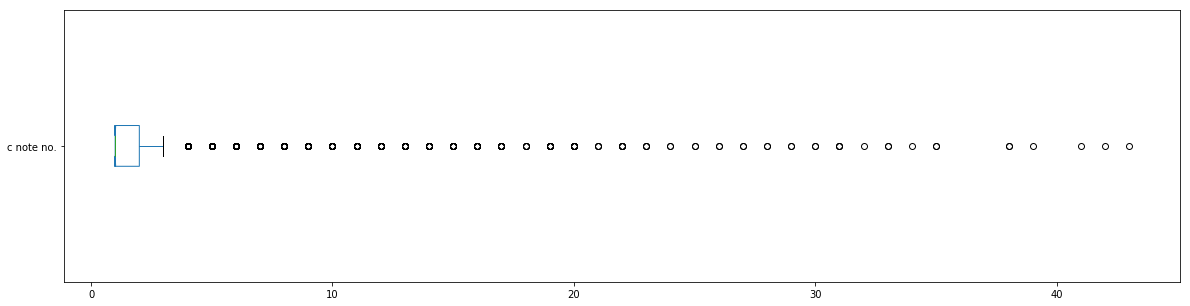

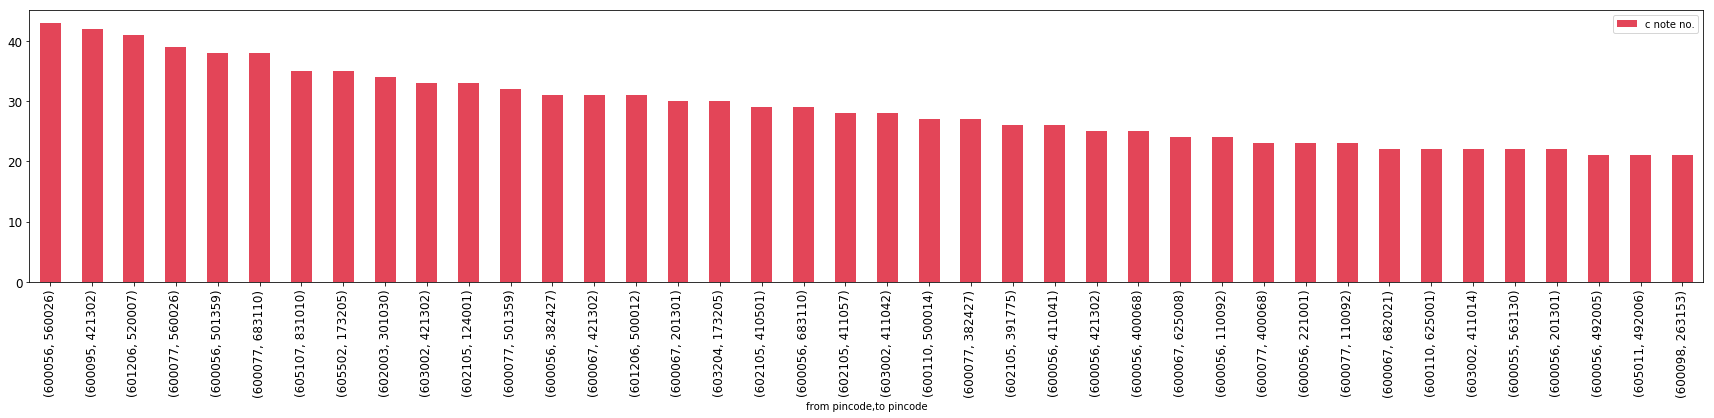

In [40]:
# grouping by from pincodes and to pincodes

df4=pickup_merge1.groupby(['from pincode','to pincode']).count()['c note no.'].sort_values(ascending=False)
df4=df4.to_frame(name=None)

df4.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()
df4.describe()

df4[df4['c note no.']>20].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

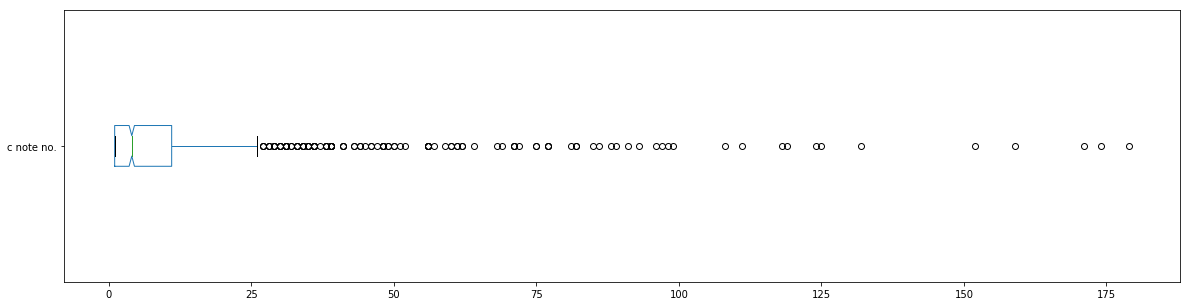

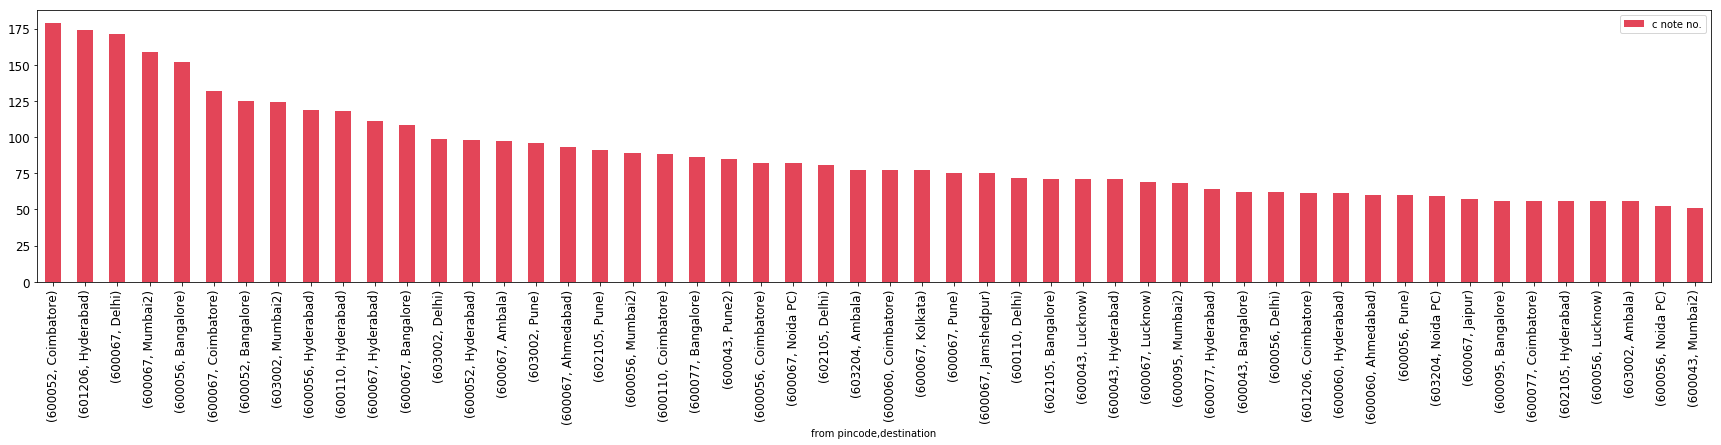

In [41]:
# grouping by from pincodes and destinations

df5=pickup_merge1.groupby(['from pincode','destination']).count()['c note no.'].sort_values(ascending=False)
df5=df5.to_frame(name=None)

df5.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()
df5.describe()

df5[df5['c note no.']>50].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

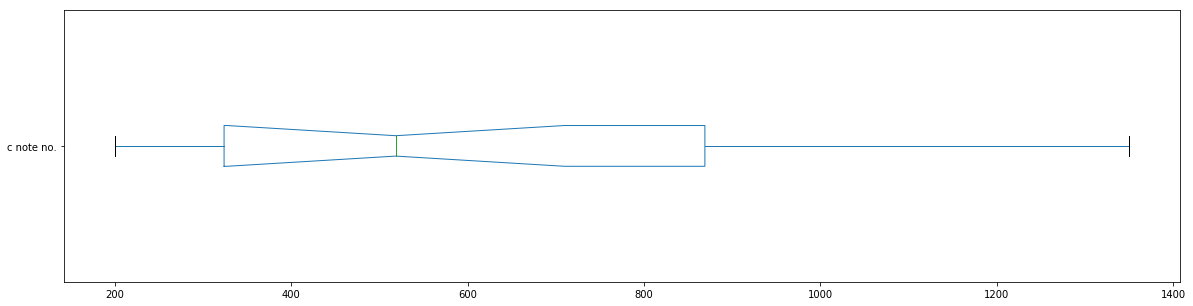

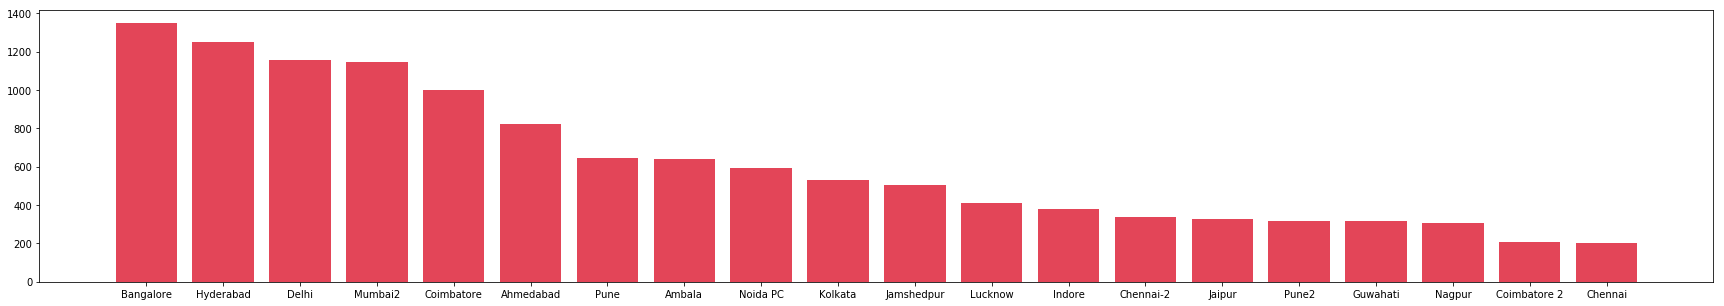

In [42]:
# grouping by destinations alone

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,5)

df55=pickup_merge1.groupby(['destination'],as_index=False).count()[['destination','c note no.']].sort_values(by='c note no.',ascending=False)
#df55=df55.to_frame(name=None)

df55.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()
df55.describe()

#df55[df55['c note no.']>0][['destination','c note no.']].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)

plt.bar(df55[df55['c note no.']>0]['destination'],df55[df55['c note no.']>0]['c note no.'], color="#e34558")

top5_d=df55[df55['c note no.']>850]['destination']

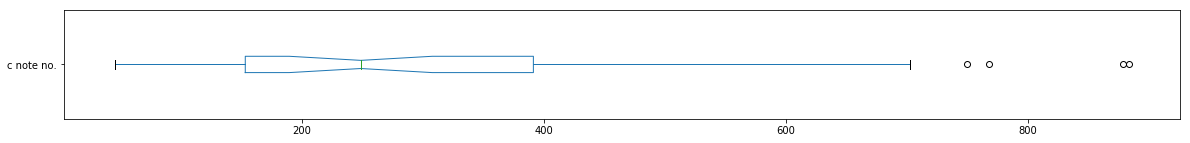

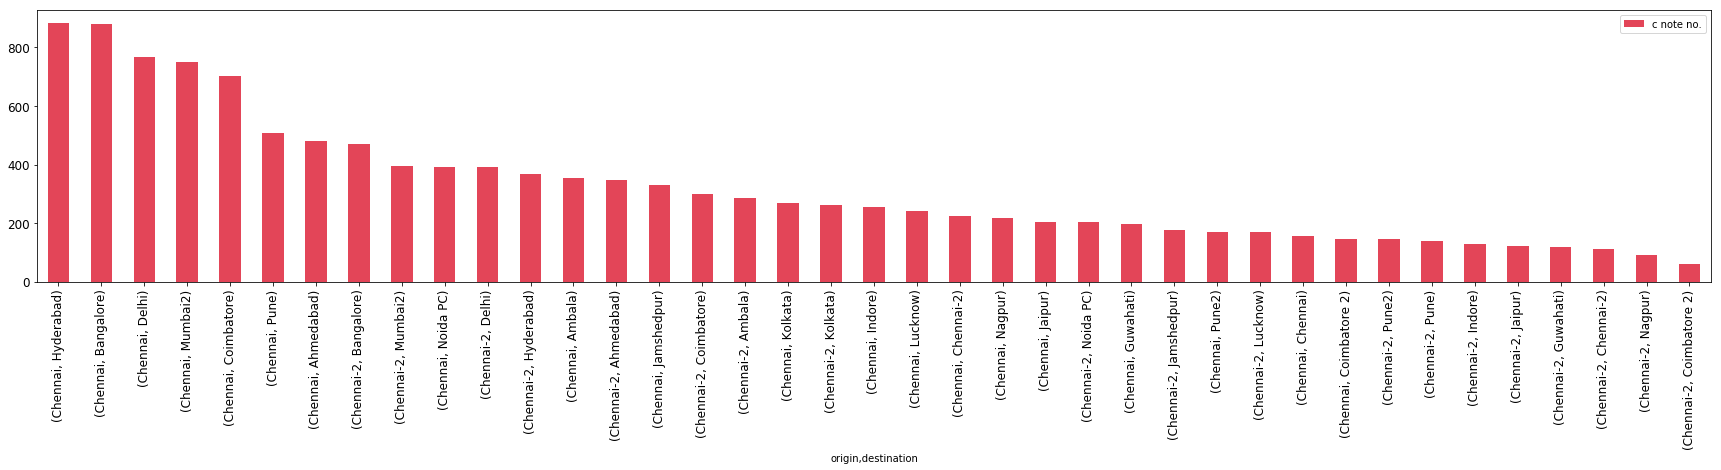

In [43]:
# grouping by from Origin and destinations

df6 = pickup_merge1.groupby(['origin','destination']).count()['c note no.'].sort_values(ascending=False)

df6=df6.to_frame(name=None)

df6.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,2), vert=False)
plt.show()
df6.describe()

df6[df6['c note no.']>50].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

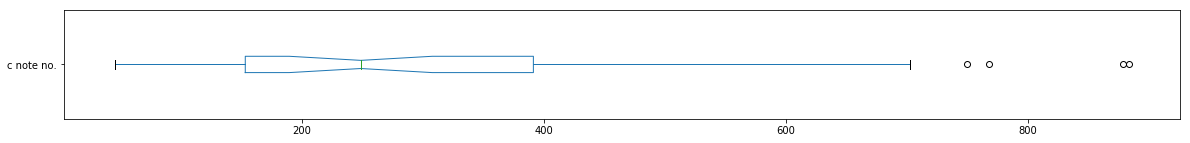

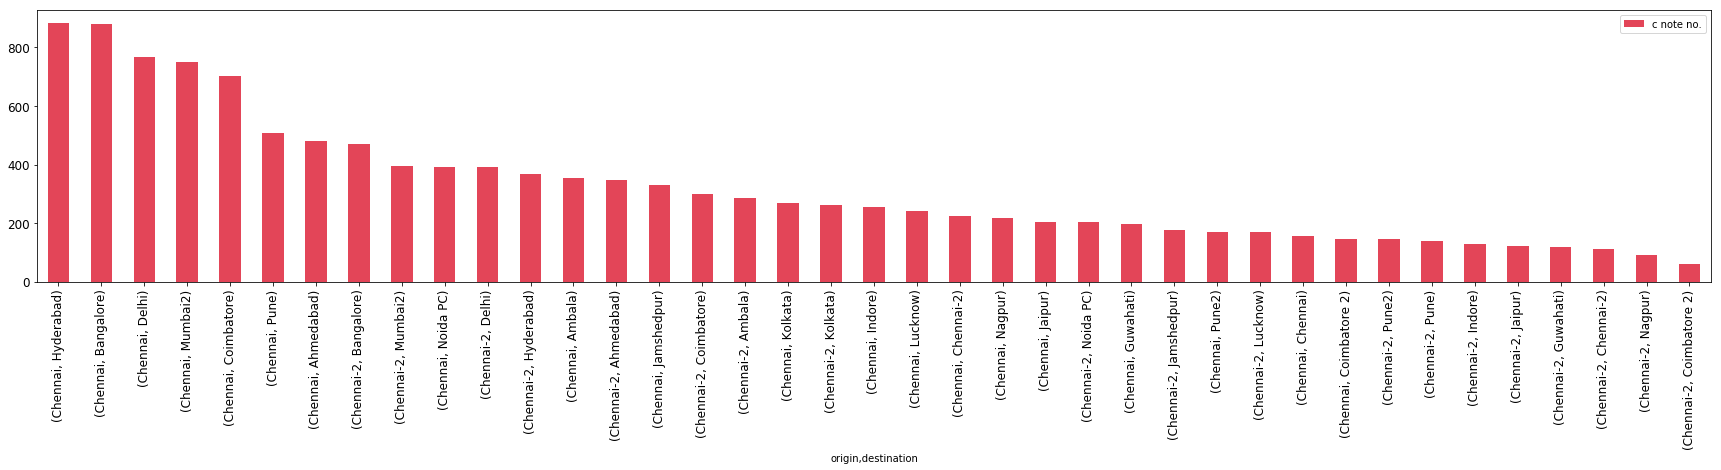

In [44]:
# grouping by from Origin and destinations


df6 = pickup_merge1.groupby(['origin','destination']).count()['c note no.'].sort_values(ascending=False)

df6=df6.to_frame(name=None)

df6.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,2), vert=False)
plt.show()
df6.describe()

df6[df6['c note no.']>50].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

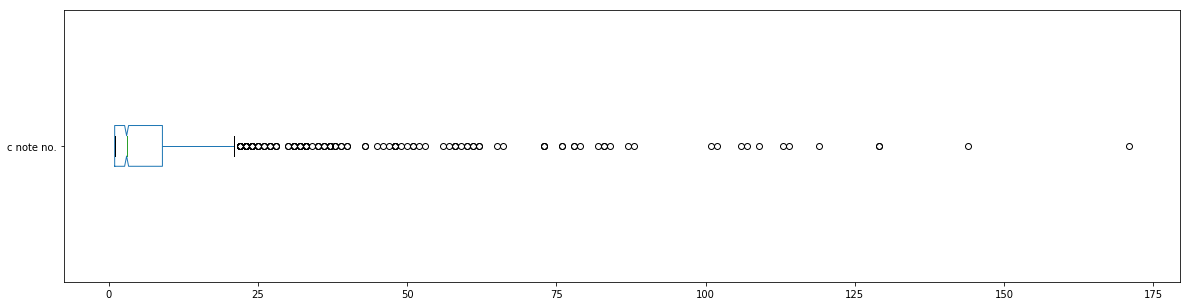

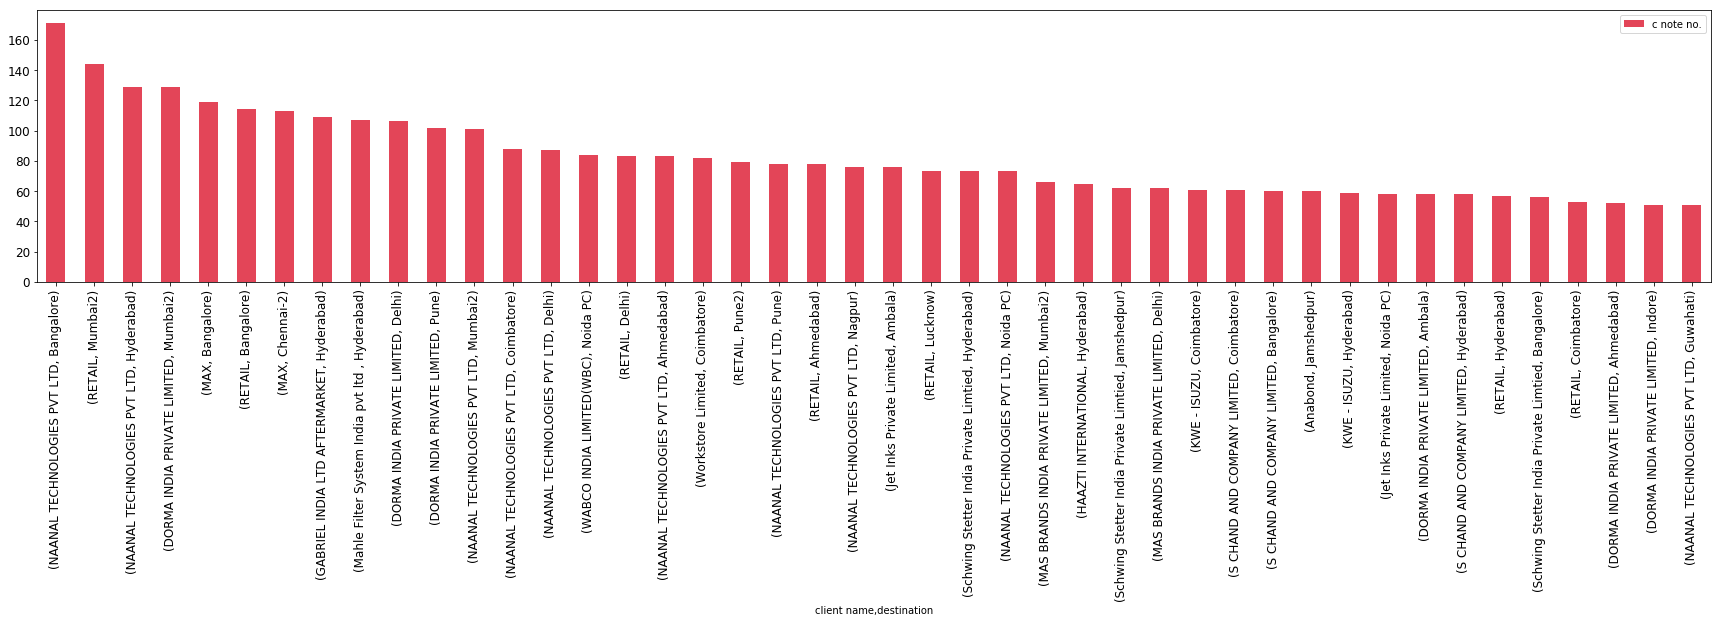

In [45]:
# client vs destination

# boxplot of total consignment counts grouped by client,destination 

df7=pickup_merge1.groupby(['client name','destination']).count()['c note no.'].sort_values(ascending=False)
df7=df7.to_frame(name=None)
df7.describe()

df7.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
df7[df7['c note no.']>50].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

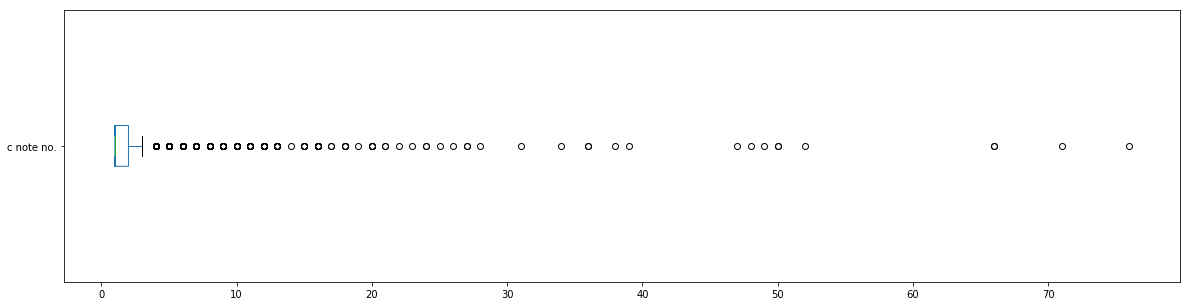

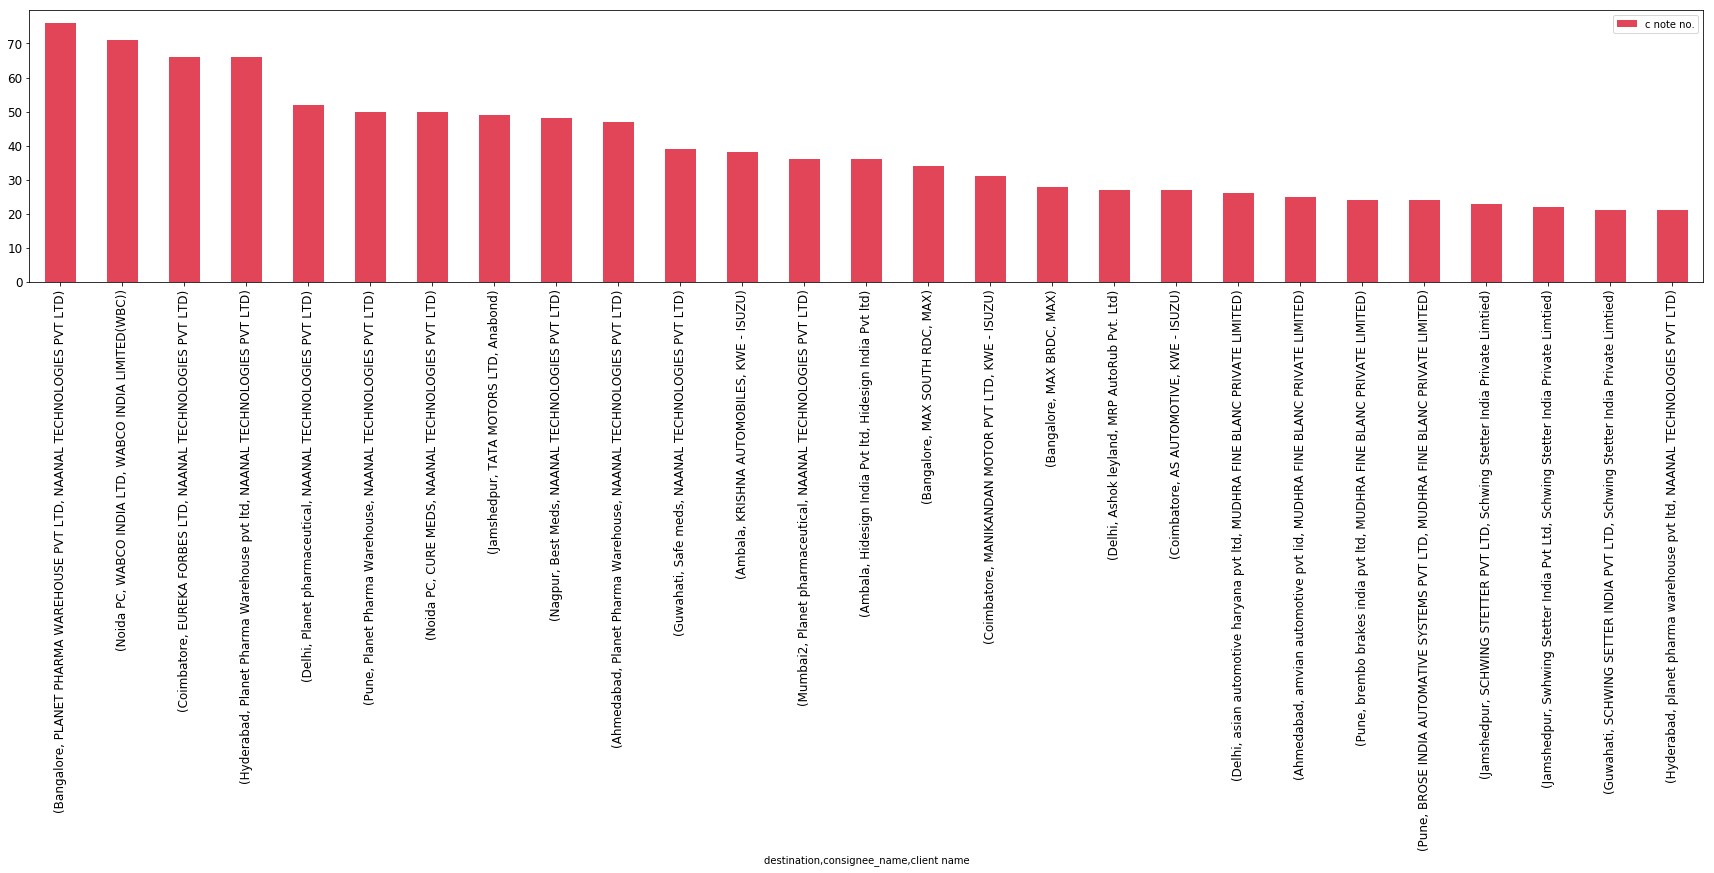

In [46]:
#  destination vs consignee


# boxplot of total consignment counts grouped by client,destination 

df8=pickup_merge1.groupby(['destination','consignee_name','client name']).count()['c note no.'].sort_values(ascending=False)
df8=df8.to_frame(name=None)
df8.describe()

df8.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
df8[df8['c note no.']>20].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)

plt.show()

In [47]:
for i in pickup_merge1['consignee_name'].sort_values(ascending=True).unique():
    print(i)


.PRAVEEN VAREK
109 Shoppers Stop LTD.
120 SHOPPERS STOP LTD
262VLB Engineering college road, kovai pudur, Coimbatore
29MEENA BAZAR
29Meena Bazar
2M INDUSTRIAL ENTERPRISES
3ACE ENGG SERVICES
3G elevators
3s Class Solution
4 th floor hematolagy
5kypack india pvt ltd
7 PEAKS CUCLES'N FITZ
78317 Automotive P Ltd
8 MM INFOTECH
8MM Infotech
A I ENTERPRISES- AVADI-MAX
A KISHORE
A P ENTERPRISES
A Q MECHANICAL ELECTRICAL
A U ENGINEERING COLLEGE
A U Engineering College Ground
A V MOTORS
A&A MODULAR SYSTEMS
A&B ENTERPRISES
A. Gomathy
A.K.TRADING CO
A.P ENTERPRISES
A/C PLANT 0130
A1 ENTERPRICSE
AABAD FOOD PVT LTD
AABSHAAR
AAD CORPORATION PRIVATE LIMITED
AADARSH PRIVATEM LIMITED
AAKANKSHA HEYMODI
AAKARTI SUPER SNACKS PRITVATE LIMITED
AARODHAYAGAM
AAROGI PAPER IND
AARYA BIKES
AARZOO BANU
AASHIRVAD ETHNIC
AASTHA CLEANROOM SYSTEMS PVT LTD
AATMAN INNOVATIONS P LTD
ABA-C.G ROAD (ATESBER)
ABARIS HELATHCARE
ABBAS SHAMSUDEEN
ABC AGENCIES
ABC TRAINERS
ABDU RAHIMAN- CADD CENTRE
ABDUL AZIZ
ABDUL HAI IBRAHIM
A

DPS Technologies
DR REDDYS LABORATORIES LTD
DR.ASHOK KUMARJANA
DR.L.H.Hiranandani
DREAM ZONE
DRISHTI JAYESH
DRY BLEND FOODS P. LTD.
DS MAX REALITY
DS SPICECO PVT LTD
DTDC 3PL
DUCKBILL BOOKS
DUNCANS TEA LTD
DURGA CYCLES
DURGA ENTERPRISE
DURGA TRADING CO
DURJA MARKETING AGENCIES
DY.CMM/D/FUR/SHEEL
DYNAFLEX PVT LTD
DYNAMIC ENTERPRISES
DYNAMIC TECHNO INDIA PVT LTD
DYNAMIIC MARKETING
Damoder coconut products
Dana india
Darbhanga cycle traders
Darling digital world p ltd
Dee Tee Industries Ltd
Deens construction
Deep gramoudyog sewa santhan
Dekkraon Telecom Pvt. Ltd
Delh trading company
Delhi public school
Delta biopharma p ltd
Department of defence,
Desai infra projects ind pvt ltd
Dhanam auto agengies
Dhannam Auto Agencies
Dhanslakshmi book house
Dilip buildcon
Dilip buildcon ltd
Dining industries pvt Ltd,
Directorate of census operations rajasthan jaipur
Disha infotech
Dk enterprises
Docson india
Doehler India pvt ltd
Dover India Pvt Ltd
Dr kadam
Dr. Subhalakhmi
Dr.Roys Diagnostics &Imagi

HUMAN CARE PHARMACEUTICALS
HUMFIT HEALTH AND FITNESS PVT LTD
HUSNA YOUSUF
HUSSAIN
HUSSAIN BAI
HYD CFA PIRAMAL ENTERPRISES LTD
HYDAC PVT LTD
HYDER ALI
HYDER JAHAN
Haja
Hallmark elevators
Hanna Marketing
Hanumant assiciates
Haradhan Adhikari
Hari Krishna Paladugu
Harper Collins Publishers
Havells India
Hdb
Hdfc Ergo general insurance company ltd
Hdfc ergo central insurance company Ltd,
Healers lab
Health happiness pvt ltd
Health india insurace
Helen industries
Hema agencies
Hema book world
Henkel anand India
Hevea Engineering works pvt ltd.
Hfw Textiles Pvt Ltd
Hhalsa cellular pvt ltd
Hi tech air system
Hi tech cycle
Hidesign India Pvt Ltd
Hidesign India Pvt lltd
Hidesign India Pvt ltd
Hidesign India pvt ltd
Hidesign india pvt Ltd
Hill lifecare
Hilti India Private
Hilti India Private Limited
Hilti India Pvt Ltd
Himansu motors
Hinansu motors
Hindustan automotives
Hindustan cons
Hindustan health care
Hindustan unilever
Hiran agro ceuticals p ltd
Hisesign  India pvt ltd
Hitech Motors
Hold i

LAKSHMI MACHINE WORKS
LAKSHMI MACHINE WORKS LTD
LANDMARK CONCRETE
LARSEN & TOUBRO LIMITED
LARSEN & TOUBRO LTD
LARSEN & TURBO LTD
LARSEN&TOUBRO
LATALA CONST
LATHIF  KHAN
LATHIFA JAMIL AHMED
LAVANYA SAREES
LAXMI  ELECTRICAL
LAXMI AUTO AGENCIES
LAXMI CHAURUEDI
LAXMI DEVI
LAXMIVINAYAK VENTURES
LAZARAS
LE MARBLE GALLERRY PVT LTD
LE PLAI SIR
LEDUIN DISOUGA
LHRA AJMERA
LIEFSTYLE INTERNATIONAL LTD  max  retail  division
LIFE INTERNATIONAL PVT LTD.
LIFE LINE SURGICALS
LIFE STYLE INTERNATIONAL PVT LTD
LIFE STYLE INTERNATIONAL PVT. LTD
LIFE STYLE INTERNATIONAL PVTLTD
LIFE STYLE INTERNATIONLS PVT LTD
LIFE STYLEINTERNATIONAL PVT LTD
LIFESTYLE
LIFESTYLE INTER.P.LTD
LIFESTYLE INTERNATINAL PVT LDT
LIFESTYLE INTERNATIONAL P. LTD
LIFESTYLE INTERNATIONAL PVT LTD
LIFESTYLE INTERNATIONAL PVT LTD  MAX FUN REPUBLIC MALL
LIFESTYLE INTERNATIONAL PVT LTD EASYBUY DIVISION
LIFESTYLE INTERNATIONAL PVT LTD GUDUVANCHERY MAX
LIFESTYLE INTERNATIONAL PVT LTD MAX
LIFESTYLE INTERNATIONAL PVT LTD OMR CHENNAI
LIFESTYLE INT

NEPTUNE READY MIX CONCRETAE
NEPTUNE READYMIX CONCRETE PVT.LTD
NESTLE INDIA LTD
NETMEDS AAD CORPORATION LTD
NEUECO PACKSOLUTIONS PVT. LTD.
NEW BENGAL
NEW BOOK CENTRE
NEW CANARA SALES
NEW COLOUR INDIA
NEW DESIGNER WEB PVT LTD
NEW GEETHA TIMBER
NEW GEN OFFICE SYSTEM
NEW PAL AND SONS KIDS CAMP PUNA
NEW PARADIGM
NEW SHYAMA CYCLE
NEW SRINIVASA AGENCIES
NEW VIDYA MANDIR-BOKARO
NEWLITE AGENCY
NHK spring india ltd
NIKAAR COLECTIONS
NIKAYA EBO
NIKHAR FASHION HERITAGE
NIKIT SAHNEY
NIKITA DISTRIBUTORS
NILESH -CADD
NIMBLE INFOTECH
NIPPAN EXPRESS PVT LTD
NIPPON AUDIOTRONIC PVT LTD
NIPUN - DREAMZONE
NIRMA LIMITED MANDALI
NIRMAL AGENCIES
NIRMAL CREATIONS
NIRMALA  AGENCIES
NIRMALA DUTTA
NISA INDUSTRIAL
NISA industrial SERVICES PVT. LTD.
NISHA DISTRIPUTORS
NISHAT PURVELN
NISHREEN HUSSAIN
NITA ASHOK IDNANI
NITAI PRESS CAMP PVT LTD
NITIN CALIBRATION SERVICES
NITIN KUMAR HILTI INDIA
NITIN SALES CORP
NIZAMUDEEN
NOOR BANU SHAIK HANIF
NORTH BICYCLES PVT LTD
NORTH EAST BEVERAGES
NOUSHAD SHEIKH ALI
NOVATEK ELEC

RKE AUTO INDIA PVT LTD
RM CHEMICAL
RM Mari
RMZ INFOTECH
ROBERD D SOUZA
ROBERT BOSCH ENGINEERING
ROBERT BOSCH ENGINEERING AND BUSINESS SOLUTION
ROBERTNA DESOUGA
ROBIN SENAPATI
ROCA BATHROOM PRO P LTD
ROCA BATHROOM PRODUCTS PVT LTD
ROCK N ROAD
ROCKWELL INDUSTRIES LTD.
ROCKWORTH FURNITURE SYSTEMS
ROCKWORTH SYSTEMS FURNITURES
ROCKY CYCLES PVT LTD
ROHA DEYEHOM P LTD
ROHAN ENTERPRISES
ROHID SHARMA
ROHIT ENTERPRISES
ROHORA AUTO AGENCIES
ROLI
RONNIL ENTERPRISES
ROODRAKSH PRO BUILDER
ROOPA SRIRAM
ROOPRAJ DRESS
ROOTS CORPORATION
ROSA INTERNATIONAL
ROSEMARY IDEAL SCHOOL
ROSHAN BANU SHAIK
ROYAL BOOK DISTRIBUTORS
ROYAL CYCLE IMPORTING CO
ROYAL DIARY FOODS
ROYAL MARKETING
RPL ENG CONSULTANCY PVE LTD
RPP READYMIX
RR tools&equipment
RS SOLUTIONS
RSH GLOBAL PVT LTD
RUCHI ORGANIC LTD
RUDRAKSHA DETERGENT & CHEMICALS PVT LTD
RUHANI ENTERPRISE
RUKSANA MOHAMED SAAFI
RUPA CO LIMITED
RUPWANI HEENA
RUTUJA ELECTRONICS
RV SOLUTIONS PVT LTD
RWM Enterprises,
RZM
RZM INVENTORY
Radco Marketing Private Limited
RadhA 

SURESH BABU
SURGICARE
SURIN AUTOMOTIVE PVT LTD
SURJEET SINGH
SURUCHI SAREE MADIA
SURYA CONS
SURYA PROCESSED FOOD P LTD
SURYAKOTI ENTERPRISES
SVE C SANITARY STORES
SVM vega mall
SVS Enterprises
SVS PROJECTS
SVS PROJECTS INDIA PVT LTD
SWAMISHRI TRADING
SWAPNA BISWARA
SWARAJ SECUTEC
SWARNA MOTORS
SWASTIK AIRCONDITIONING
SWASTIK REFRIGERATION SYNDICATE
SWISS GARNIER GENEXIA
SWITCHING AVO ELECTRO POWER LIMITED
SWITCHING AVO ELECTRO POWER LTD
SYED  MOMIN
SYED  SHAKIR
SYED ADIL HOSSAIN
SYED FARHANA
SYED MOHAMED NASER
SYED SHAREEF
SYEED MOHAMED
SYLOG MANAGEMENT SERVICES PVT LTD
SYMEGA FOOD INGRIDENTS LTD.
SYMEGA FOODBINGREDENTS LTD
SYNCHRONIC MEDICAL SYSTEMS
SYNCOM HEALTHCARE LTD
SYNERGY THRISILINGTON
Saar Creations
Saddam
Sadvidya children school
Safe meds
Sagar international school
Sainath enterprise
Salcomp Manufacturing India Pvt Ltd
Salona Cotspin Limited
Sandar Han Sung Technology Pvt Ltd
Sanghvi Enterprises
Sanhav enginnering
Sankar Adida
Sanskritii Samvaedhan Mandal
Santhosh Kumar
Sara

eco tropico tours pvt ltd
ecoled
electrical research and delvelpe associations
elevator station
elite automobiles
elvoxe elevators
embiotics lab p ltd
enkebee infra
equinox equipments infa
equipped solutions
eruka fores
erure
escort elevators
essal pro pack ltd
esskay technologies
euphoria pharma agencies
eureka forbes
eureka forbes ltd
euro elevators
eurotech design systems
ever rise infosolutions
everyshine pharma
evm passenger car
evolve design
excel enterprise
excel enterprises
excel industries ltd
exide industries ltd
exide life
exide life insurance company limited
express  electro  elevators co.
express electro elevators co
express elevators
express roadways p ltd
expresselectroelevators
falcon international drug company
farhath aagencies
farm machinery and tractor
fauhruddin
federin elevators
femtech solutions
fena (P) ltd SILVASSA
fena (p) ltd
fena(p)limited
filpkart i pvt lvt
fine elevators
firdos rahim beg
fire fox bikes PVt
fire fox bikes pvt.ltd
fl smith pvt ltd
flavrich fl

m s graphics
m.m. industrial controls pvt ltd
m.r dijendra kundu
m.s vaishanvi surgicals
m/s atandra energy
m/s loya pre engineered
m/s plant pharma
m/s sai surya motors
m/s sheetal label
m/s sun data processing
m/s tata motors ltd
m/s uma pharma
m/s yen pharma
macleads PHARMACEATICALS LTD
macson shiping age
madhu
magnum enterprises
mahadev garments
mahadev mobile acceories
mahalaxi pharma chem
mahatma Gandhi memorial high school
mahboob
mahee technologies
mahendra lifestyle
mahesh surgical & pharma
mahindra& mahindra
makita power tools inida ltd
mala
malabar gold
malas fruit products
malaya agencies
man infracuntruction
mandke foundation
manglam partners beverages
manilal c desai & sons
manilal.c.desai..sons
manipal hosphal
manipal technologies
manish dresses
manjinder
manjit
manjul publishing house pvt ltd
manu enterprises
manya enterprise
maria agencies
marico ltd
mariya fernades
mark Electro elevatorco
markelectroelevators
markelectroelevatorsco
maroor agencies
mars enterprises
mar

symbol identification system
symetrix engineering solutions
talha
tammu
tara
taruninternational
tata aig general insurance
tata international Dit pvt ltd
tata martfoodz
tatahitachi consturuction machinery  co ltd
tc infotech
team engineers
techforce composities pvt ltd
techni aids
technip
technogies india p ltd
technoindusries
technotrades
tejwala engineering company
telecom bazar
telecome power tech
tesco industries
thakur tradng
the andhra
the bike faram
the corner co
the corrector
the cycle world
the development commission
the himalaya drug co.
the jalpal motors & cycle
the printers house pvt ltd
the sandesh ltd
the superintendent
three star agencies
thyssenkrupp elevators india p ltd
times it solutions
tirex
tirupati beverages
top cool cooling
toprani advanced
torque
torrent pharmaceuticals
torrent pharmaceuticals ltd
tower 3
toyota meterial handling
trackfins india
tratec engineers pvt ltd
travel news service
travel retail
travel retail services
trent ltd
trent tlypemarket
tresara

In [48]:
# finding a weekly pattern in date vs consignment count 

pickup_merge1.columns
pickup_merge1[(pickup_merge1['cn booking date & time'].isnull()) | (pickup_merge1['date'].isnull())][['cn booking date & time','date']]

pickup_merge1['date'].dtypes
df9=pickup_merge1.groupby('date').count()[['c note no.']]
#df9=df9.to_frame(name=None)

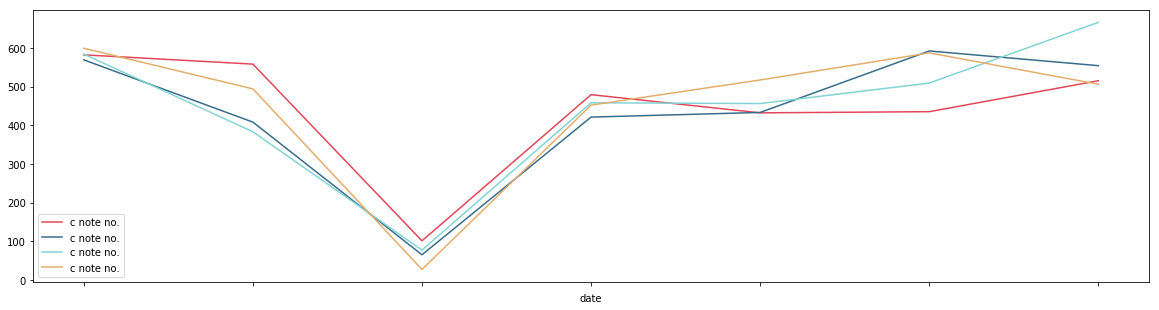

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df9[0:7].plot(kind="line",color="#e34558",ax=ax,figsize=(20,5))
df9[7:14].plot(kind="line",color="#376b8a",ax=ax,figsize=(20,5))
df9[14:21].plot(kind="line",color="#82d3d4",ax=ax,figsize=(20,5))
df9[21:28].plot(kind="line",color="#e3ad6b",ax=ax,figsize=(20,5))

plt.show()

#plt.plot(df9[0:8].index, df9[0:6], "o")


In [50]:
# finding a weekly pattern in date vs pickup pincode vs consignment count 

df10=pickup_merge1.groupby(['date','destination'],as_index=False).count()[['date','destination','c note no.']]




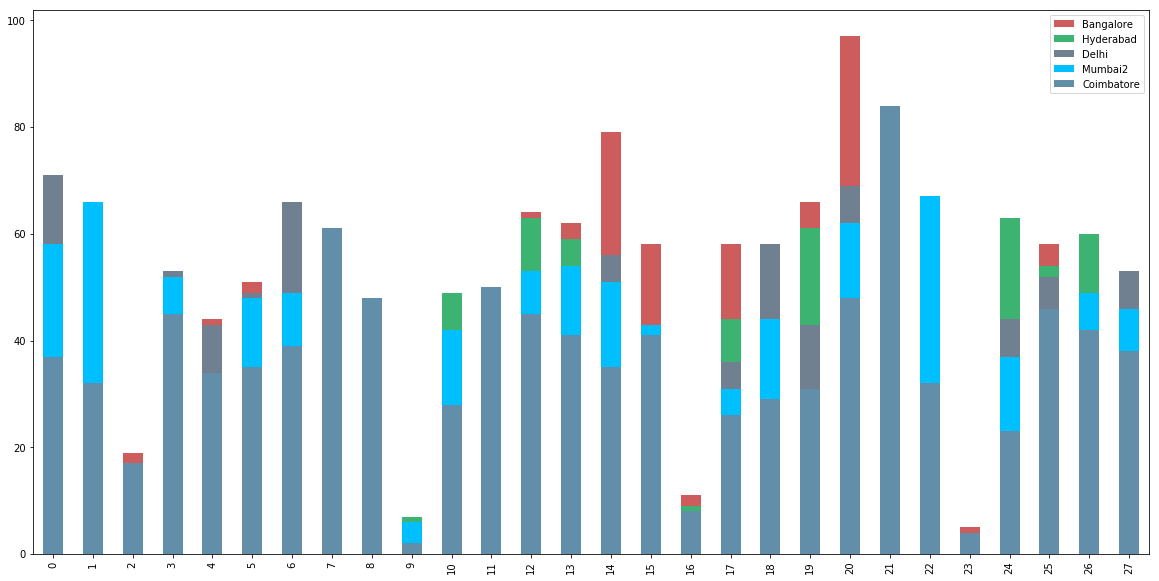

In [51]:
# finding a weekly pattern in date vs destination vs consignment count 
colour=['#40b2d6','#e3ad6b','#5b5c5b','#ffdd56','indianred','#f58c46','#66cdaa','#fa7f72','#e6194b','#e14355','#ffe119', '#f58231','#46f0f0','red','#8fbc8f','skyblue','yellow','green','grey',
       '#3fb4b7']
len(colour)
colour1=['indianred','mediumseagreen','slategrey','deepskyblue','#638ea9']

df11=pickup_merge1.groupby(['date','destination'],as_index=False).count()[['date','destination','c note no.']]
uniqued=df11.destination.unique()
uniquedate=df11.date.unique()


indx=[]

for i in uniqued:
    df11[i]=0

for i in uniquedate:
    for j in uniqued:
        indx=df11[(df11.date==i) & (df11.destination==j)].index
        df11.loc[indx,[j]] = df11.loc[indx,['c note no.']]['c note no.']

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i,j in zip(top5_d,colour1):
    
    df11[['date',i]].groupby('date',as_index=False).sum()[['date',i]].plot(kind="bar",color=j,ax=ax,figsize=(20,10))
    
plt.show()

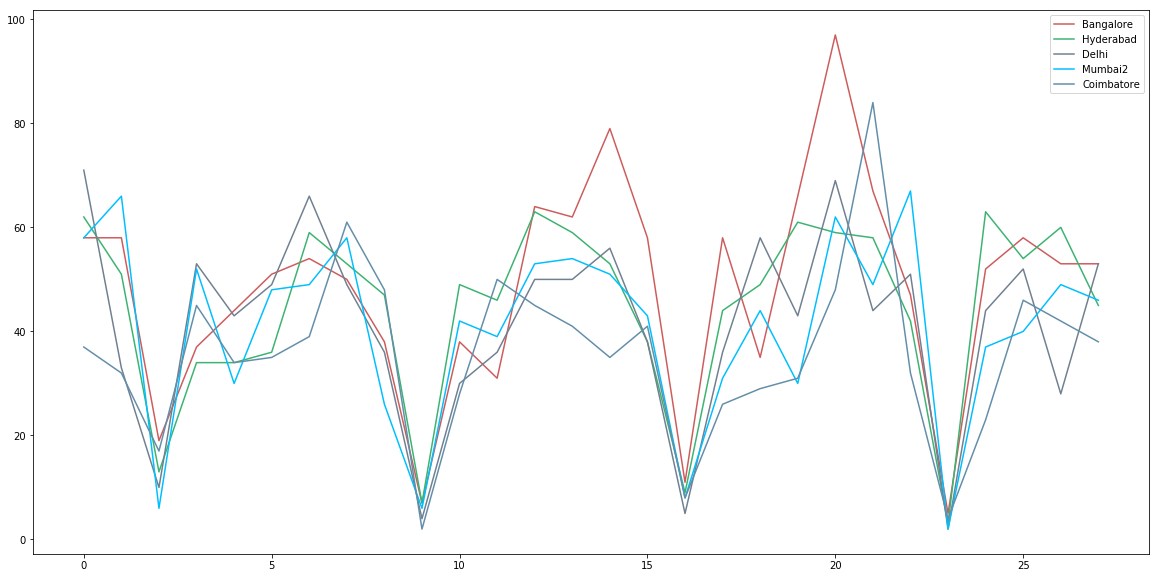

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i,j in zip(top5_d,colour1):
    
    df11[['date',i]].groupby('date',as_index=False).sum()[['date',i]].plot(kind="line",color=j,ax=ax,figsize=(20,10))
    
plt.show()

In [53]:
#plot histogram of weight
#plot bar chart of vs total weight
#plot of 


In [54]:
pickup_merge1.columns

Index(['Unnamed: 0', 'c note no.', 'from pincode', 'to pincode', 'from branch',
       'to branch', 'prq no', 'pickup_created_by', 'bp/captain/oa name',
       'bp captain name', 'user type', 'requested pick time (prq)',
       'pick up reached time', 'first scan location code', 'first ou in time',
       'cn creation date & time', 'cn booking date & time', 'client name',
       'client code', 'origin', 'destination', 'actual_weight',
       'vehicle_number', 'vehicle_type', 'prs_no', 'consignor_name',
       'consignee_name', 'consigner_address', 'consignee_address', 'date',
       'prs_totalweight', 'cn', 'deps type', 'bucketing', 'responsible person',
       'deps reason', 'deps sub_reason', 'type of material',
       'type of packaging', 'damage'],
      dtype='object')

In [55]:
pickup_merge1.head()

,Unnamed: 0,c note no.,from pincode,to pincode,from branch,to branch,prq no,pickup_created_by,bp/captain/oa name,bp captain name,...,prs_totalweight,cn,deps type,bucketing,responsible person,deps reason,deps sub_reason,type of material,type of packaging,damage
0,0,1002568354,600068,781001,MAAB5,GAUB1,811152,Jeyaram R,Sham Transport,Guru,...,5813.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1002568355,600068,781011,MAAB5,GAUT1,811152,Jeyaram R,Sham Transport,Guru,...,5813.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1002568357,600068,211003,MAAB5,IXDB1,811152,Jeyaram R,Sham Transport,Guru,...,5813.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1002568356,600068,211003,MAAB5,IXDB1,811152,Jeyaram R,Sham Transport,Guru,...,5813.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1002568353,600068,688537,MAAB5,COKB1,811152,Jeyaram R,Sham Transport,Guru,...,5813.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pickup_merge1.dtypes

Unnamed: 0                     int64
c note no.                     int64
from pincode                   int64
to pincode                     int64
from branch                   object
to branch                     object
prq no                        object
pickup_created_by             object
bp/captain/oa name            object
bp captain name               object
user type                     object
requested pick time (prq)     object
pick up reached time          object
first scan location code      object
first ou in time              object
cn creation date & time       object
cn booking date & time        object
client name                   object
client code                   object
origin                        object
destination                   object
actual_weight                float64
vehicle_number                object
vehicle_type                 float64
prs_no                       float64
consignor_name                object
consignee_name                object
c

In [57]:
# removing spaces between registration numbers to make it easy for comparision with one another
pickup_merge1.vehicle_number = pickup_merge1.vehicle_number.str.replace(' ', '',5)

In [58]:
#converting all registration numbers to upper case
len(pickup_merge1.vehicle_number.unique())
pickup_merge1.vehicle_number=pickup_merge1.vehicle_number.str.upper()
len(pickup_merge1.vehicle_number.unique())

320

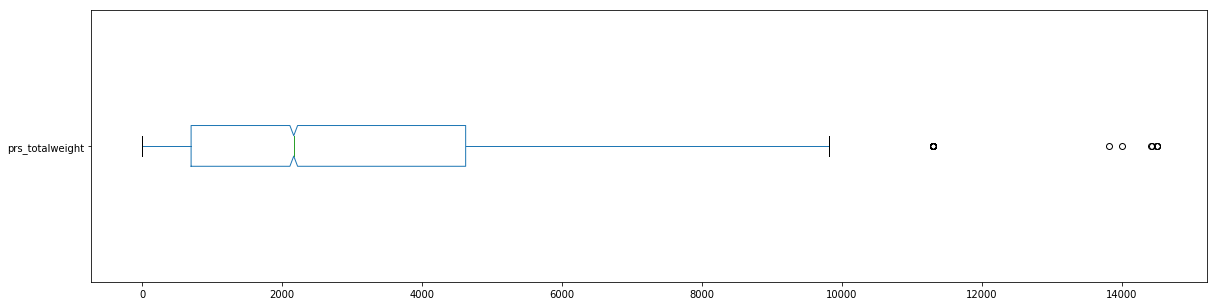

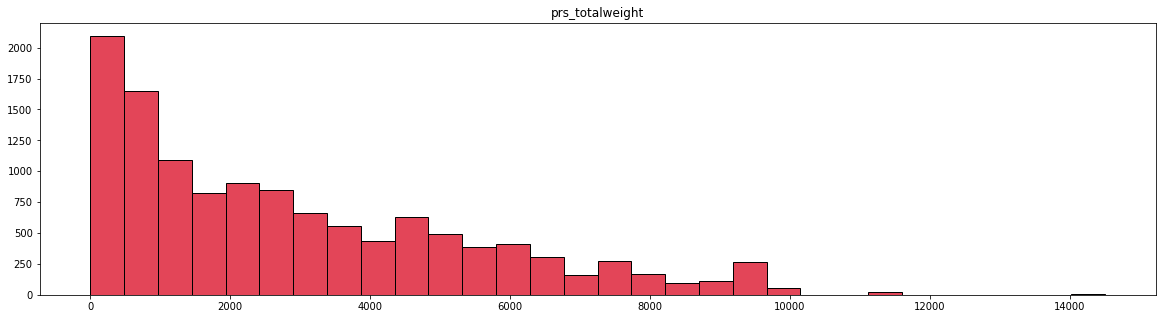

In [59]:
# boxplot, histogram and bar chart of total prs_weights. Based on this we will impute missing values for vehicle type

pickup_merge1.boxplot(column='prs_totalweight', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()
pickup_merge1.hist(column="prs_totalweight", grid=False ,figsize=(20,5),bins=30,color="#e34558",edgecolor="black")
plt.show()


In [60]:
# finding the maximum weight for a particular registration number and assigning the vechile type 

df12=pickup_merge1.groupby('vehicle_number',as_index=False).max()[['vehicle_number','prs_totalweight']]

df12['vehicletype']=''

In [61]:
df12.loc[df12['prs_totalweight']<=1000,'vehicletype']='tataace'
df12.loc[((df12['prs_totalweight']>1000) * (df12['prs_totalweight']<=1500)),'vehicletype']='aldost'
df12.loc[((df12['prs_totalweight']>1500) * (df12['prs_totalweight']<=2500)),'vehicletype']='tata407'
df12.loc[((df12['prs_totalweight']>2500) * (df12['prs_totalweight']<=3000)),'vehicletype']='canter14'
df12.loc[(df12['prs_totalweight']>3000  * (df12['prs_totalweight']<=4000)),'vehicletype']='ft20'
df12.loc[(df12['prs_totalweight']>4000),'vehicletype']='ft24'


C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [62]:
pickup_merge2=pd.merge(pickup_merge1,df12, how='left', left_on='vehicle_number', right_on='vehicle_number')
pickup_merge2.drop(columns =[ 'vehicle_type','prs_totalweight_y'], inplace = True)
pickup_merge2.rename(columns={'prs_totalweight_x': 'prs_totalweight'}, inplace=True)
pickup_merge2.vehicletype.isnull().sum()
pickup_merge2.columns


Index(['Unnamed: 0', 'c note no.', 'from pincode', 'to pincode', 'from branch',
       'to branch', 'prq no', 'pickup_created_by', 'bp/captain/oa name',
       'bp captain name', 'user type', 'requested pick time (prq)',
       'pick up reached time', 'first scan location code', 'first ou in time',
       'cn creation date & time', 'cn booking date & time', 'client name',
       'client code', 'origin', 'destination', 'actual_weight',
       'vehicle_number', 'prs_no', 'consignor_name', 'consignee_name',
       'consigner_address', 'consignee_address', 'date', 'prs_totalweight',
       'cn', 'deps type', 'bucketing', 'responsible person', 'deps reason',
       'deps sub_reason', 'type of material', 'type of packaging', 'damage',
       'vehicletype'],
      dtype='object')

In [63]:
pickupmerge2=pickup_merge2.copy()

In [64]:
#imputing 255 null vehicle types for each PRS No based on total weight

tataace=pickup_merge2[pickup_merge2.vehicletype.isnull()][pickup_merge2.prs_totalweight<=1000].index
aldost=pickup_merge2[pickup_merge2.vehicletype.isnull()][pickup_merge2.prs_totalweight>1000] [pickup_merge2.prs_totalweight<=1500].index
tata407=pickup_merge2[pickup_merge2.vehicletype.isnull()][pickup_merge2.prs_totalweight>1500] [pickup_merge2.prs_totalweight<=2500].index
canter14=pickup_merge2[pickup_merge2.vehicletype.isnull()][pickup_merge2.prs_totalweight>2500] [pickup_merge2.prs_totalweight<=3000].index
ft20=pickup_merge2[pickup_merge2.vehicletype.isnull()][pickup_merge2.prs_totalweight>3000] [pickup_merge2.prs_totalweight<=4000].index
ft24=pickup_merge2[pickup_merge2.vehicletype.isnull()][pickup_merge2.prs_totalweight>4000].index

pickup_merge2.loc[tataace,"vehicletype"]="tataace"
pickup_merge2.loc[aldost,"vehicletype"]="aldost"
pickup_merge2.loc[tata407,"vehicletype"]="tata407"
pickup_merge2.loc[canter14,"vehicletype"]="canter14ft"
pickup_merge2.loc[ft20,"vehicletype"]="ft20"
pickup_merge2.loc[ft24,"vehicletype"]="ft24"

pickup_merge2.vehicletype.isnull().sum()

C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will b

0

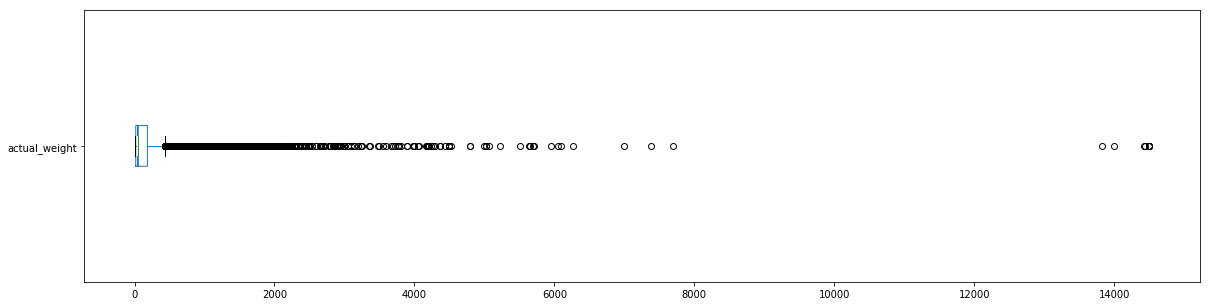

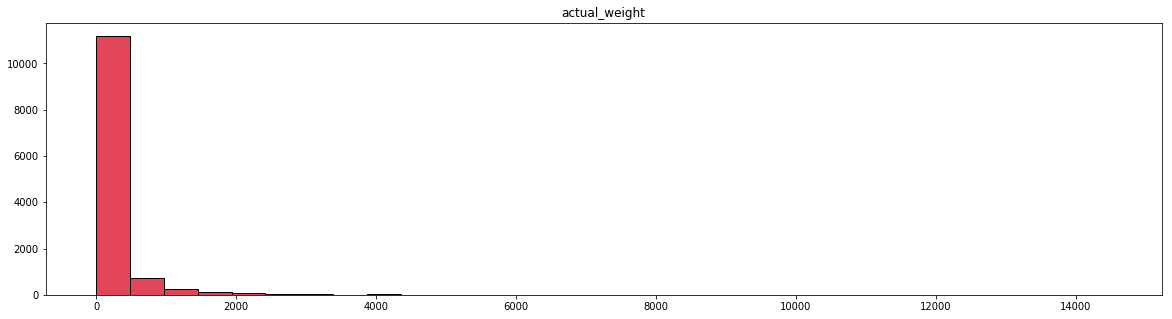

In [65]:
# boxplot, histogram and bar chart of actual prs_weights.

pickup_merge2.boxplot(column='actual_weight', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()
pickup_merge2.hist(column="actual_weight", grid=False ,figsize=(20,5),bins=30,color="#e34558",edgecolor="black")
plt.show()


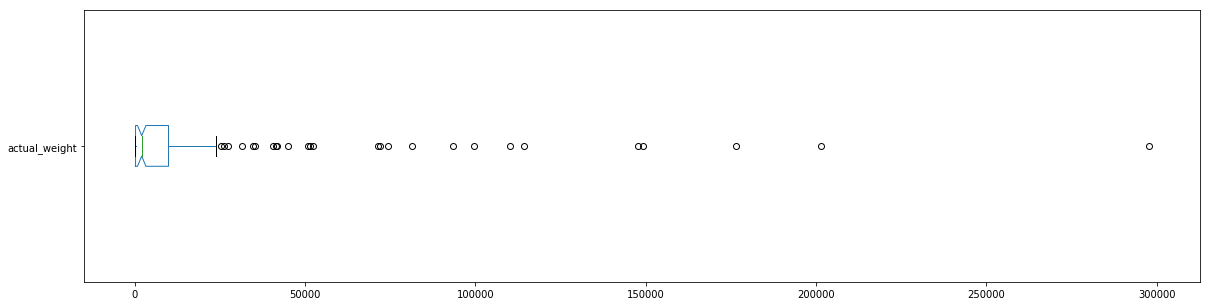

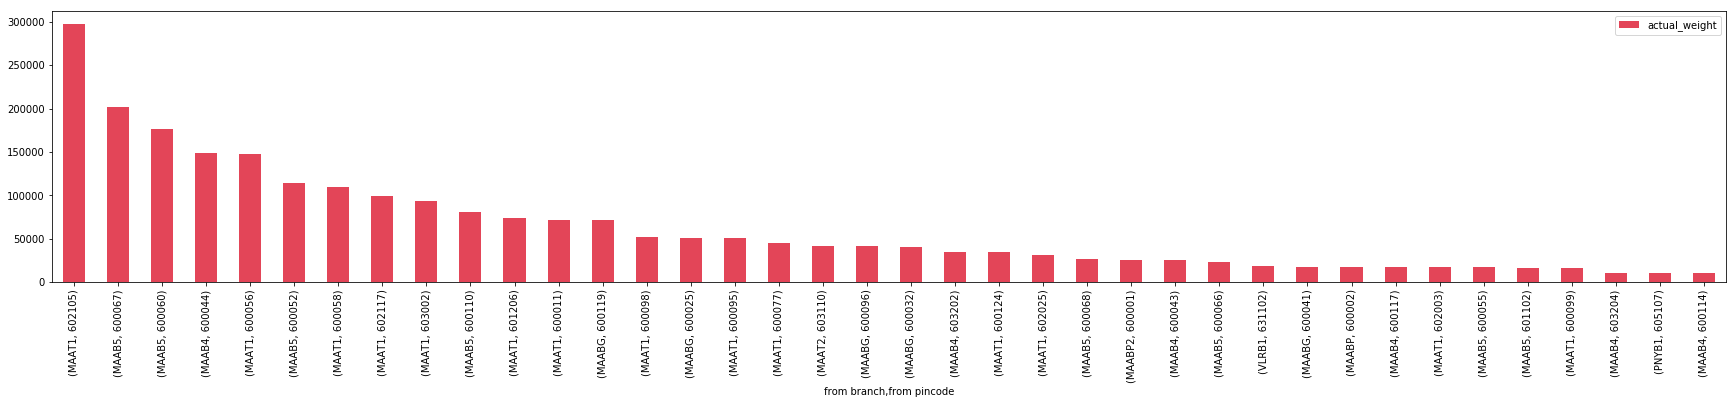

,actual_weight
count,151.000000
mean,17375.176404
std,40874.491893
min,1.540000
25%,292.500000
50%,2101.500000
75%,9968.900000
max,297771.110000


In [66]:
# plot between from branch,from pincode vs total_actual weight 

import matplotlib.pyplot as plt

df13=pickup_merge2.groupby(['from branch','from pincode']).sum()['actual_weight'].sort_values(ascending=False)
df13=df13.to_frame(name=None)
# df1.rename(columns={'c note no.': 'grouped_pincodes'}, inplace=True) # renaming the columns
df13.boxplot(column='actual_weight', notch=True, grid=False, figsize=(20,5), vert=False)
df13[df13['actual_weight']>=9968].plot(kind='bar',color='#e34558',figsize=(30,5))
plt.show()

df13.describe()

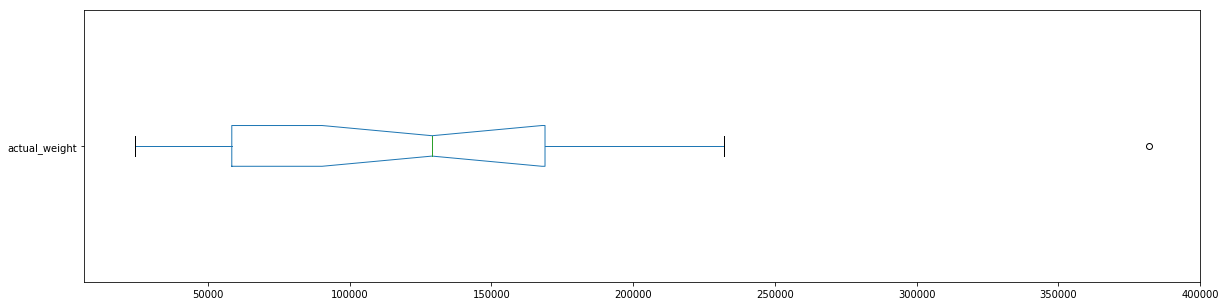

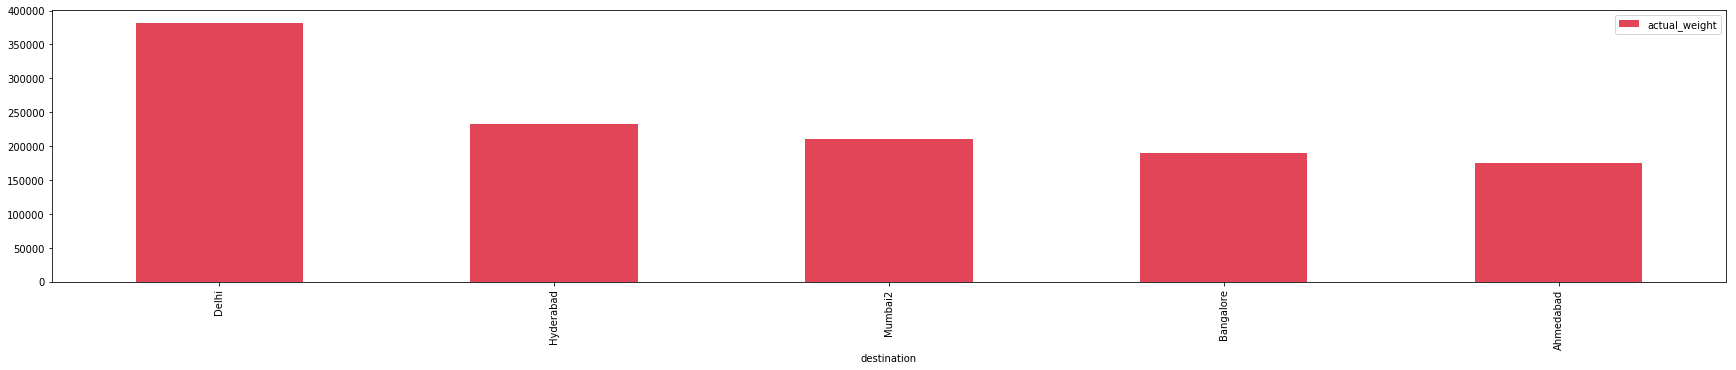

,actual_weight
count,20.000000
mean,131182.581850
std,86571.022868
min,24151.980000
25%,58452.097500
50%,129082.986000
75%,168934.083750
max,382013.743000


In [67]:
# plot between destination vs total_actual weight

import matplotlib.pyplot as plt

df13=pickup_merge2.groupby(['destination']).sum()['actual_weight'].sort_values(ascending=False)
df13=df13.to_frame(name=None)
# df1.rename(columns={'c note no.': 'grouped_pincodes'}, inplace=True) # renaming the columns
df13.boxplot(column='actual_weight', notch=True, grid=False, figsize=(20,5), vert=False)

df13[df13['actual_weight']>=168934].plot(kind='bar',color='#e34558',figsize=(30,5))
plt.show()

df13.describe()

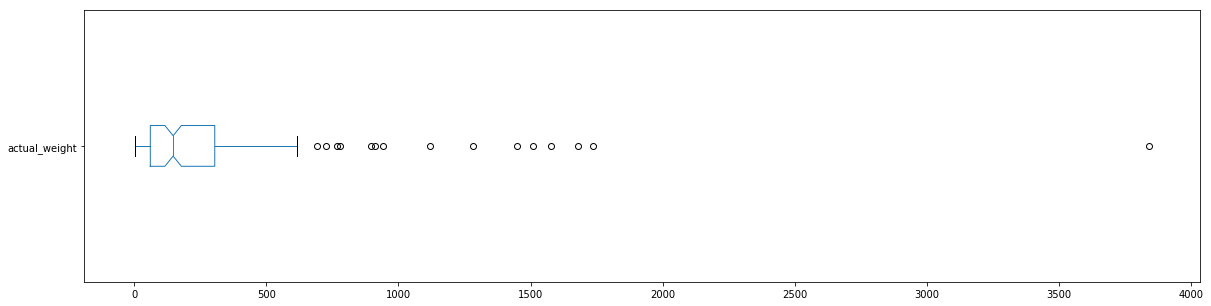

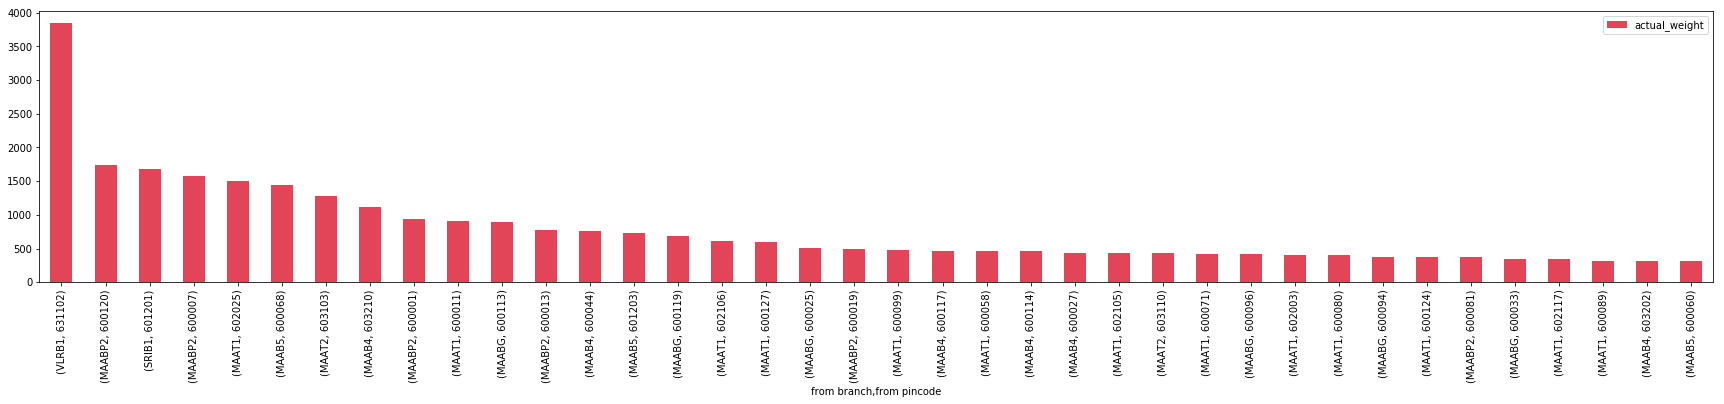

,actual_weight
count,151.000000
mean,282.033776
std,444.017553
min,1.540000
25%,61.166667
50%,147.500000
75%,305.002521
max,3840.000000


In [68]:
# plot between from branch,from pincode vs avg_actual weight 
import matplotlib.pyplot as plt


df14=pickup_merge2.groupby(['from branch','from pincode']).mean()['actual_weight'].sort_values(ascending=False)
df14=df14.to_frame(name=None)
# df1.rename(columns={'c note no.': 'grouped_pincodes'}, inplace=True) # renaming the columns
df14.boxplot(column='actual_weight', notch=True, grid=False, figsize=(20,5), vert=False)
df14[df14['actual_weight']>=305].plot(kind='bar',color='#e34558',figsize=(30,5))
plt.show()

df14.describe()

In [69]:
pickup_merge2[pickup_merge2['from pincode']==631102][['client name','consigner_address','consignee_name','consignee_address']]

,client name,consigner_address,consignee_name,consignee_address
989,PERFECT THREAD MILLS LTD.,"IYEPPEDU, Sholinghur",PREFECT THREAD MILLS LIMITED,Regd off & Mills Amberi industrial Area NH 8 A...
2437,PERFECT THREAD MILLS LTD.,"IYEPPEDU, Sholinghur",PREFECT THREAD MILLS LIMITED,Regd off & Mills Amberi industrial Area NH 8 A...
4393,PERFECT THREAD MILLS LTD.,"IYEPPEDU, Sholinghur",PREFECT THREAD MILLS LIMITED,Regd off & Mills Amberi industrial Area NH 8 A...
7740,PERFECT THREAD MILLS LTD.,"IYEPPEDU, Sholinghur",PREFECT THREAD MILLS LIMITED,Regd off & Mills Amberi industrial Area NH 8 A...
11005,PERFECT THREAD MILLS LTD.,"IYEPPEDU, Sholinghur",PREFECT THREAD MILLS LIMITED,Regd off & Mills Amberi industrial Area NH 8 A...


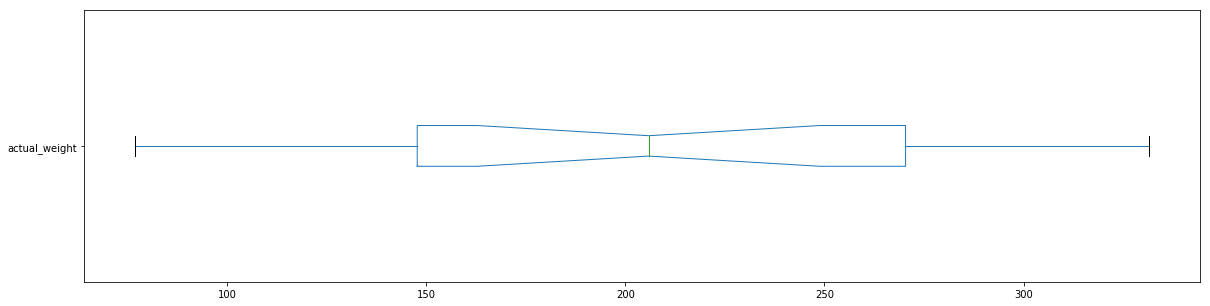

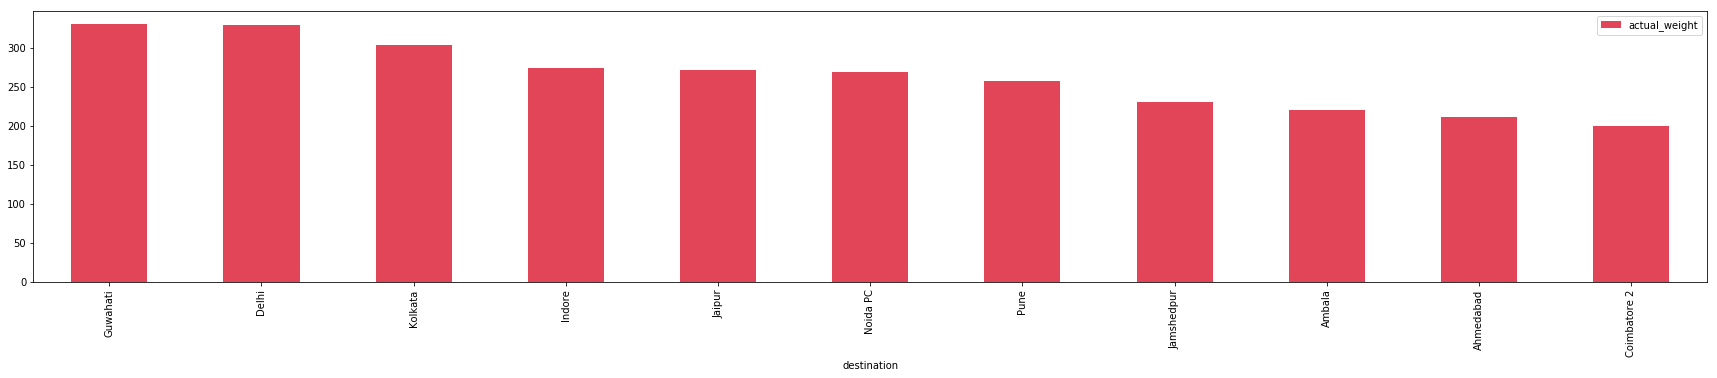

,actual_weight
count,20.000000
mean,209.288209
std,73.377131
min,76.755551
25%,147.745855
50%,205.851127
75%,270.384245
max,331.541148


In [70]:
# plot between destination  vs avg_actual weight 

import matplotlib.pyplot as plt

df15=pickup_merge2.groupby(['destination']).mean()['actual_weight'].sort_values(ascending=False)
df15=df15.to_frame(name=None)
# df1.rename(columns={'c note no.': 'grouped_pincodes'}, inplace=True) # renaming the columns
df15.boxplot(column='actual_weight', notch=True, grid=False, figsize=(20,5), vert=False)

df15[df15['actual_weight']>=200].plot(kind='bar',color='#e34558',figsize=(30,5))
plt.show()

df15.describe()

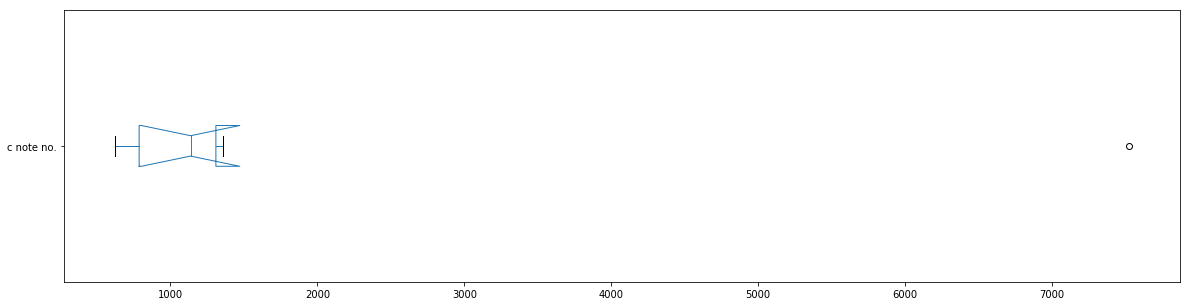

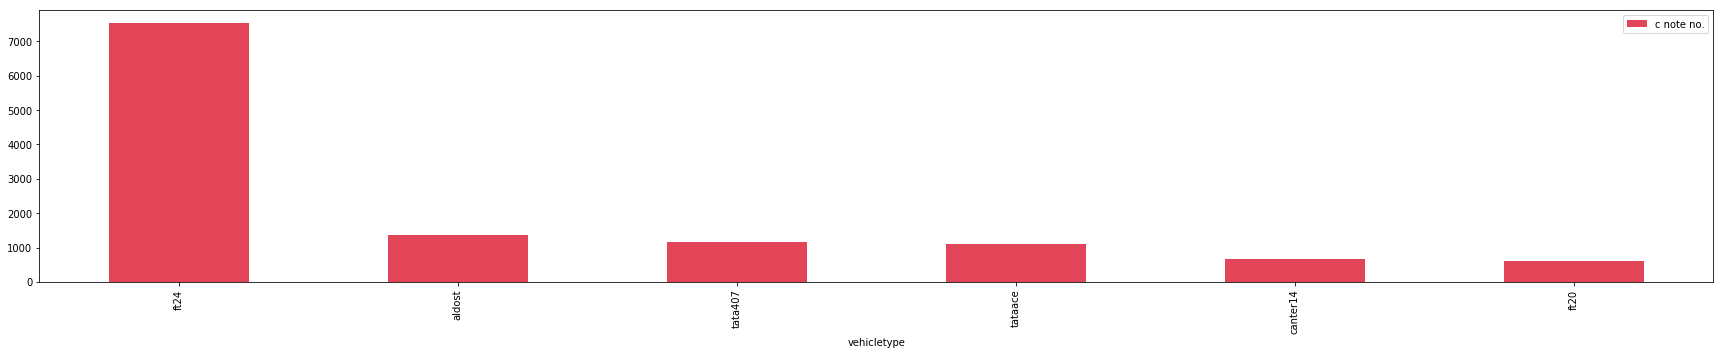

,c note no.
count,6.000000
mean,2076.500000
std,2684.550968
min,621.000000
25%,787.500000
50%,1137.500000
75%,1309.750000
max,7525.000000


In [71]:
# plot between vehicle type and vehicle total count of consignments

import matplotlib.pyplot as plt

df16=pickup_merge2.groupby(['vehicletype']).count()['c note no.'].sort_values(ascending=False)
df16=df16.to_frame(name=None)
# df1.rename(columns={'c note no.': 'grouped_pincodes'}, inplace=True) # renaming the columns
df16.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)

df16[df16['c note no.']>=0].plot(kind='bar',color='#e34558',figsize=(30,5))
plt.show()

df16.describe()

In [72]:
pickup_merge3=pickup_merge2.copy()

In [73]:
pickup_merge3['requested pick time (prq)'] = pd.to_datetime(pickup_merge3['requested pick time (prq)'], format = '%Y-%m-%d %H:%M:%S.%f')
pickup_merge3['pick up reached time'] = pd.to_datetime(pickup_merge3['pick up reached time'], format = '%Y-%m-%d %H:%M:%S.%f')
pickup_merge3.loc[:,'first ou in time'] = pickup_merge3.loc[:,'first ou in time'].str[:-3]

pickup_merge3['first ou in time']=pd.to_datetime(pickup_merge3['first ou in time'], format = '%Y-%m-%d %H:%M:%S.%f')

pickup_merge3['rqt_rt']=''
pickup_merge3['fou_it']=''

# time difference between pickup requested time, pickup reached time and pickup OU in time

pickup_merge3['rqt_rt']=(pickup_merge3['pick up reached time']-pickup_merge3['requested pick time (prq)']).astype('timedelta64[h]')
pickup_merge3['fou_it']=(pickup_merge3['first ou in time']-pickup_merge3['requested pick time (prq)']).astype('timedelta64[h]')


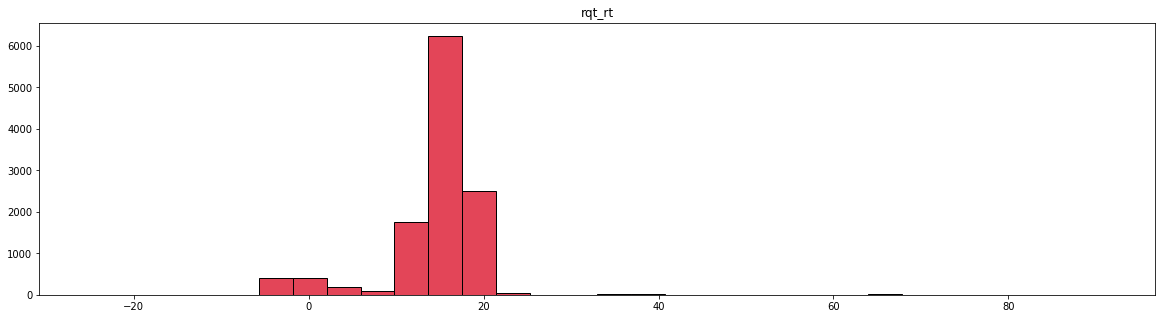

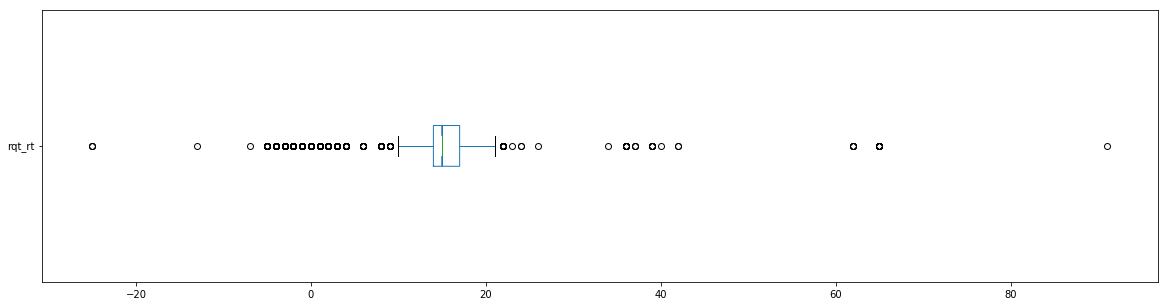

count    11692.000000
mean        14.226736
std          5.658517
min        -25.000000
25%         14.000000
50%         15.000000
75%         17.000000
max         91.000000
Name: rqt_rt, dtype: float64

In [74]:
# histogram of time differences

pickup_merge3.hist(column="rqt_rt", grid=False ,figsize=(20,5),bins=30,color="#e34558",edgecolor="black")
plt.show()

pickup_merge3.boxplot(column='rqt_rt', notch=True, grid=False, figsize=(20,5), vert=False)

plt.show()

pickup_merge3.rqt_rt.describe()

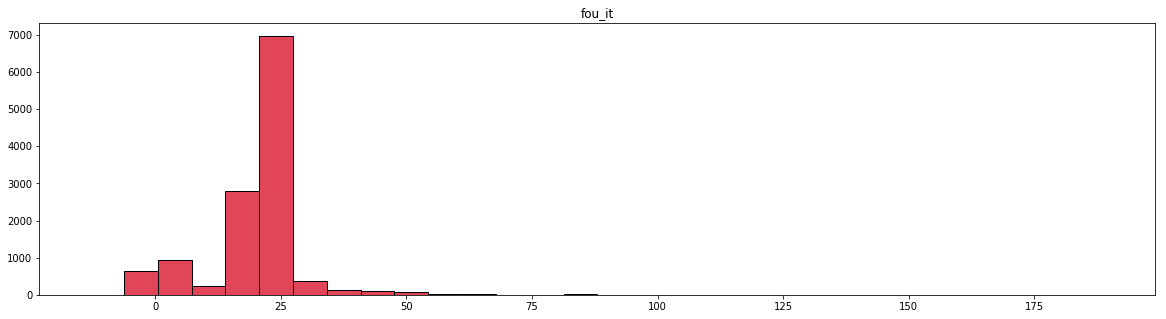

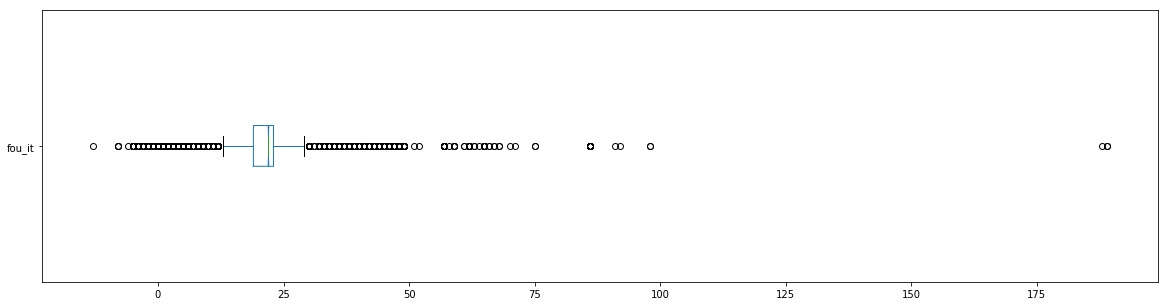

count    12342.000000
mean        19.833252
std          9.425628
min        -13.000000
25%         19.000000
50%         22.000000
75%         23.000000
max        189.000000
Name: fou_it, dtype: float64

In [75]:
# histogram of time differences

pickup_merge3.hist(column="fou_it", grid=False ,figsize=(20,5),bins=30,color="#e34558",edgecolor="black")
plt.show()

pickup_merge3.boxplot(column='fou_it', notch=True, grid=False, figsize=(20,5), vert=False)

plt.show()

pickup_merge3.fou_it.describe()

In [76]:
# relation between bp and total weight handled, bp and time delay, bp and count of consignments handled




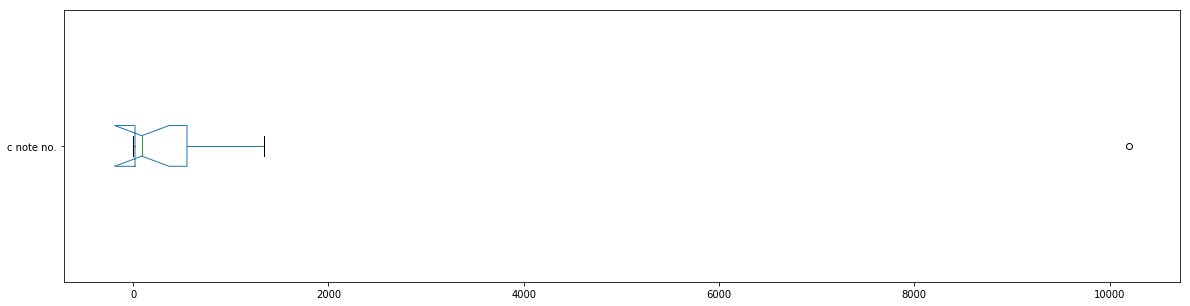

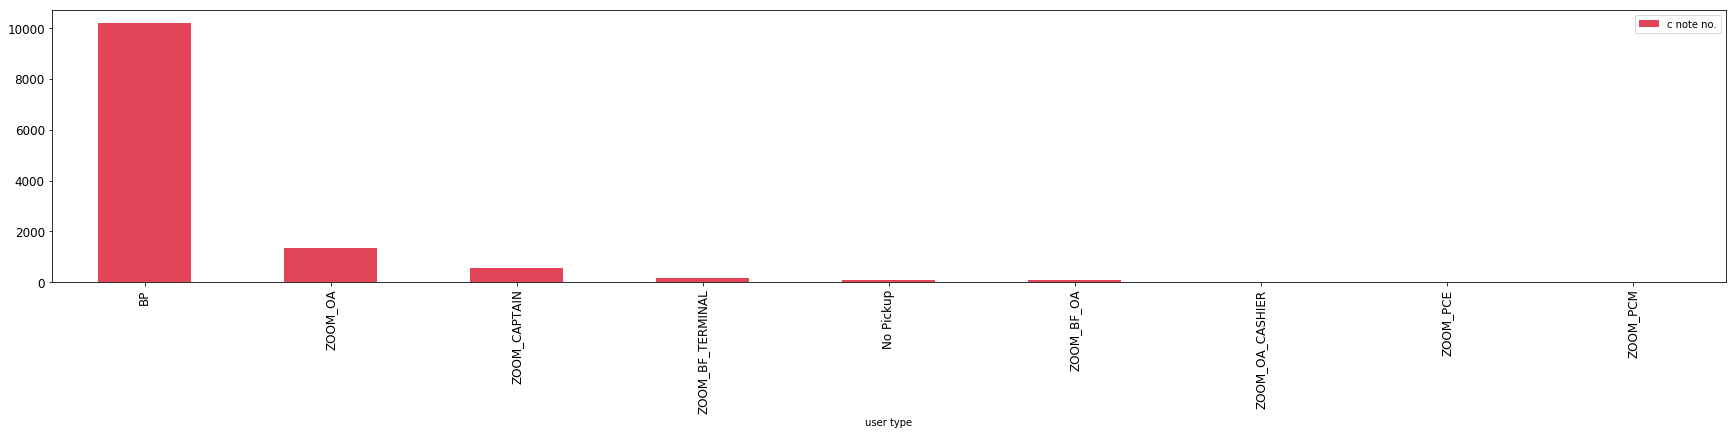

,c note no.
count,9.000000
mean,1384.333333
std,3334.661939
min,1.000000
25%,20.000000
50%,90.000000
75%,552.000000
max,10201.000000


In [77]:
pickup_merge3['user type'].unique()

df17=pickup_merge3.groupby(['user type']).count()['c note no.'].sort_values(ascending=False)
df17=df17.to_frame(name=None)

df17.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()


df17[df17['c note no.']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df17.describe()

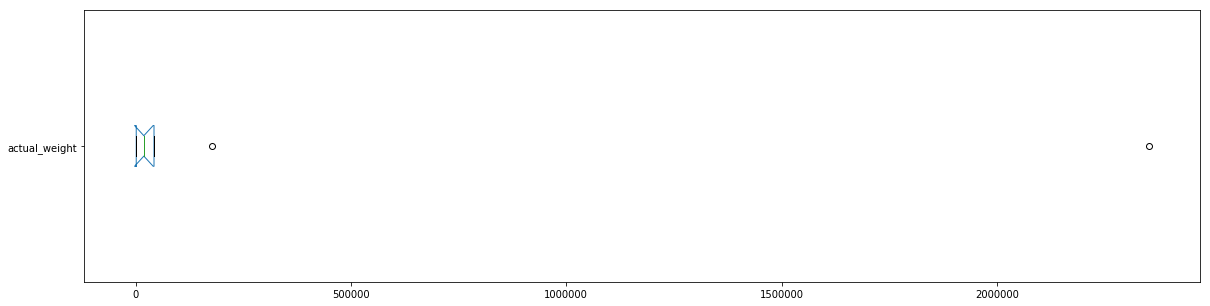

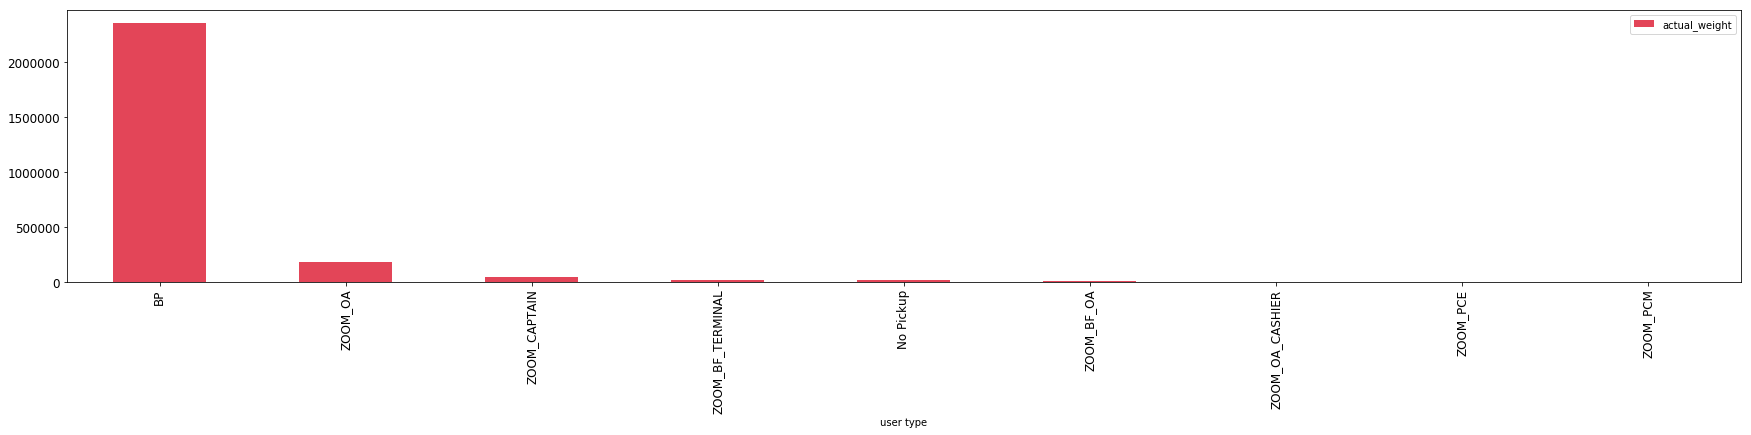

,actual_weight
count,9.000000e+00
mean,2.915168e+05
std,7.752434e+05
min,5.000000e+01
25%,1.452400e+03
50%,1.913900e+04
75%,4.271981e+04
max,2.353392e+06


In [78]:
pickup_merge3['user type'].unique()

df18=pickup_merge3.groupby(['user type']).sum()['actual_weight'].sort_values(ascending=False)
df18=df18.to_frame(name=None)

df18.boxplot(column='actual_weight', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()


df18[df18['actual_weight']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df18.describe()

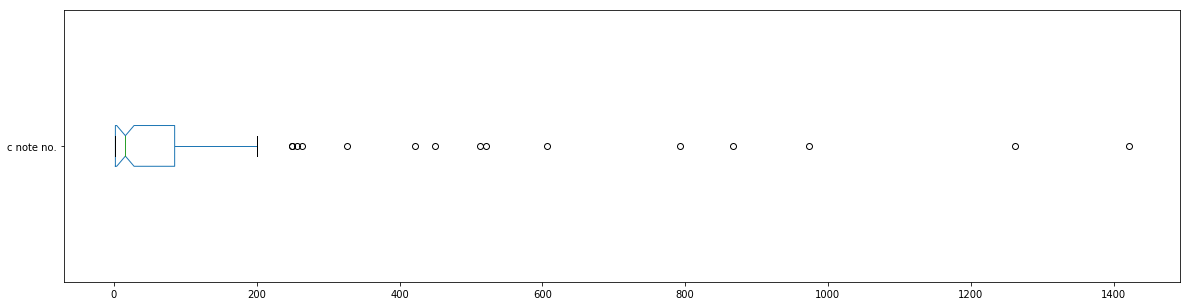

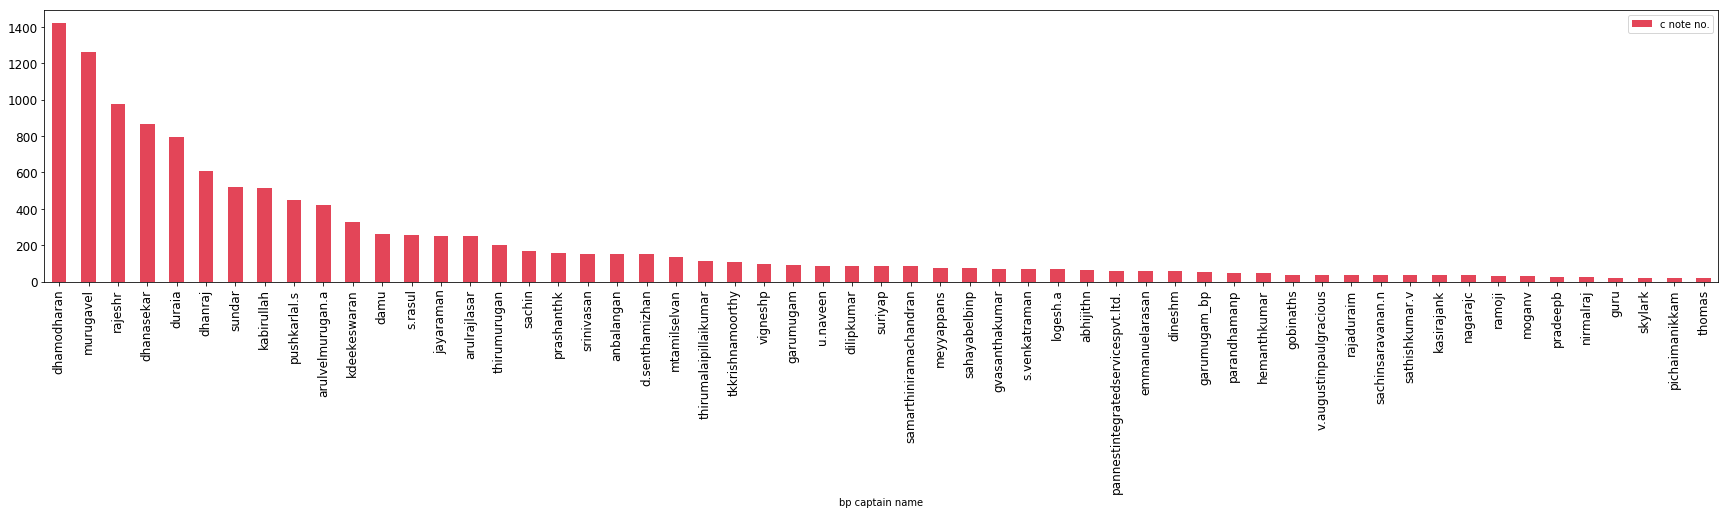

,c note no.
count,115.000000
mean,108.339130
std,239.842744
min,1.000000
25%,2.000000
50%,16.000000
75%,85.000000
max,1422.000000


In [79]:
# bp captain vs count and total weight handled
pickup_merge3['bp captain name']=pickup_merge3['bp captain name'].str.lower().str.strip().str.replace(' ', '',5)

pickup_merge3['bp captain name'].unique()

df19=pickup_merge3.groupby(['bp captain name']).count()['c note no.'].sort_values(ascending=False)
df19=df19.to_frame(name=None)

df19.boxplot(column='c note no.', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()


df19[df19['c note no.']>16].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df19.describe()

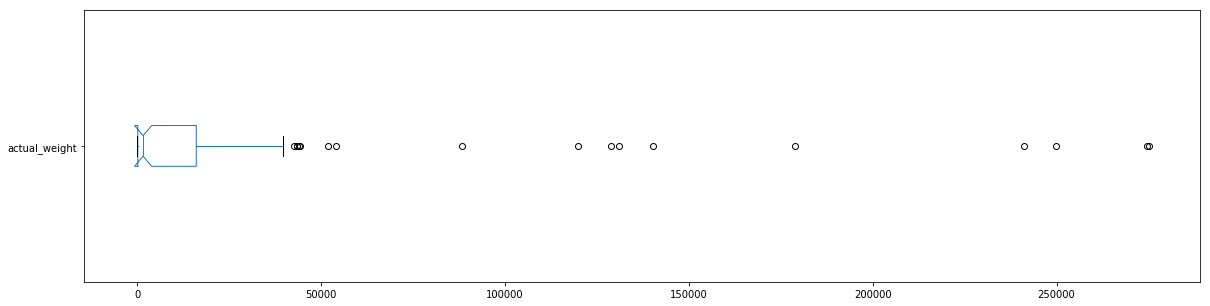

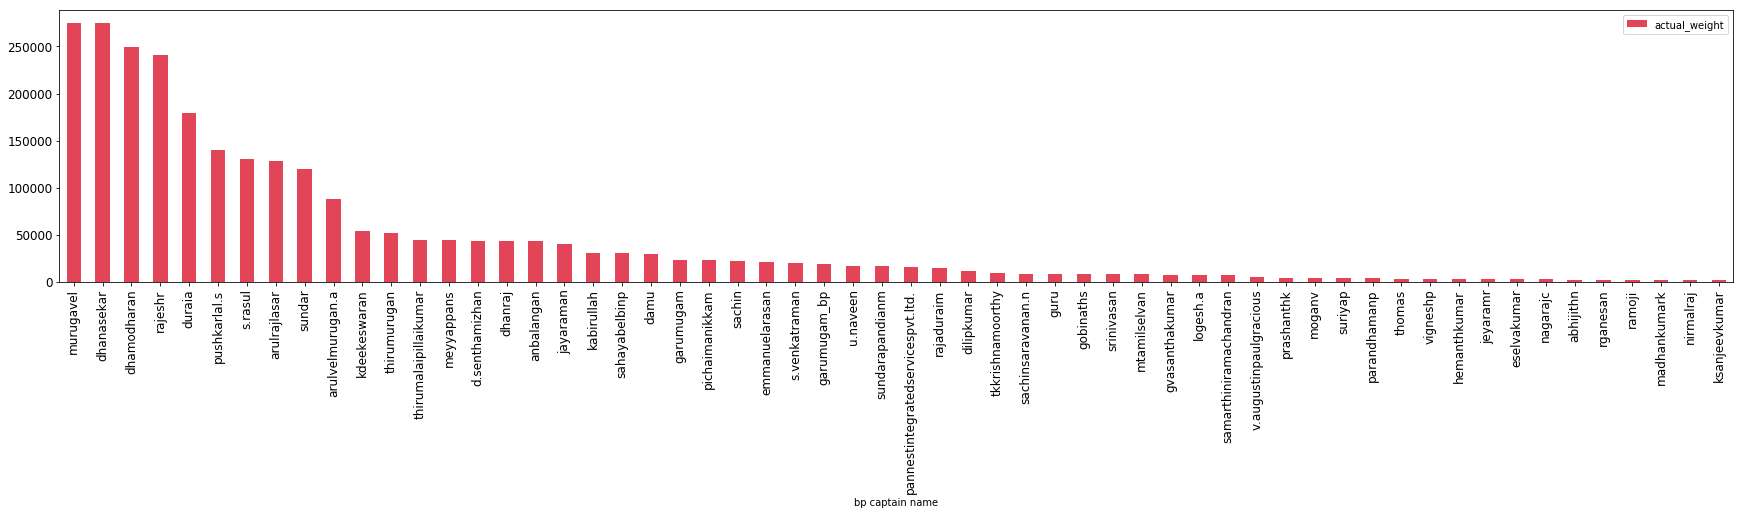

,actual_weight
count,115.000000
mean,22814.362061
std,54876.066042
min,2.000000
25%,145.000000
50%,1592.860000
75%,16046.000000
max,275170.930000


In [80]:
pickup_merge3['bp captain name'].unique()

df20=pickup_merge3.groupby(['bp captain name']).sum()['actual_weight'].sort_values(ascending=False)
df20=df20.to_frame(name=None)

df20.boxplot(column='actual_weight', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()

df20[df20['actual_weight']>1592].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df20.describe()

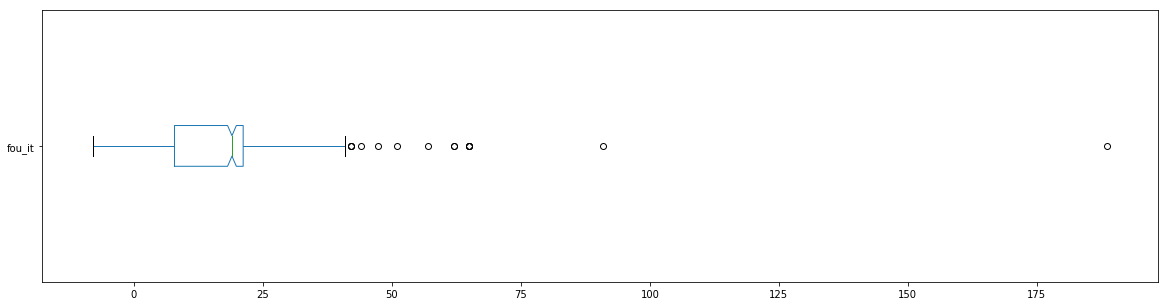

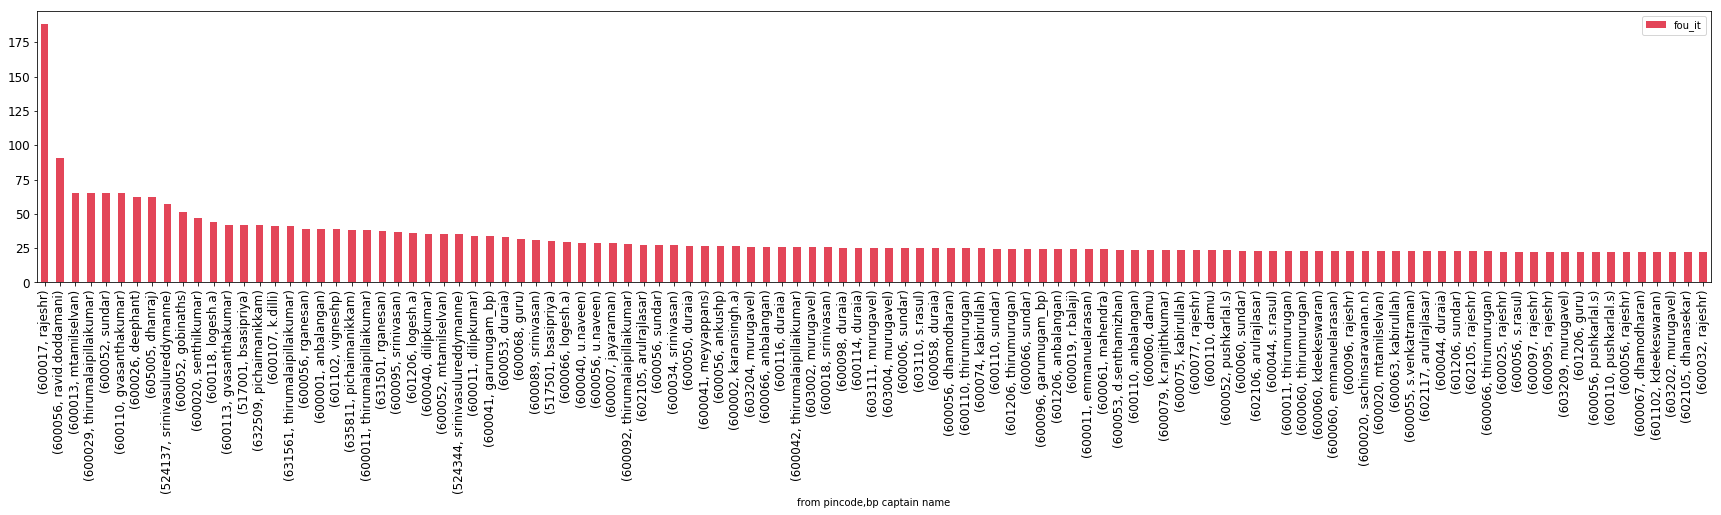

,fou_it
count,604.000000
mean,16.549487
std,13.444021
min,-8.000000
25%,7.856818
50%,19.000000
75%,21.172511
max,188.666667


In [81]:
# bp captain inside each pincode, delay time 

df21=pickup_merge3.groupby(['from pincode','bp captain name']).mean()['fou_it'].sort_values(ascending=False)
df21=df21.to_frame(name=None)

df21.boxplot(column='fou_it', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()

df21[df21['fou_it']>22].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df21.describe()


In [82]:
print(len(pickup_merge3[pickup_merge3['bp captain name']=='rajeshr']))
print(len(pickup_merge3[(pickup_merge3['bp captain name']=='rajeshr') * (pickup_merge3['from pincode']==600017)]))

print(len(pickup_merge3[pickup_merge3['bp captain name']=='ravid.doddamani']))
print(len(pickup_merge3[(pickup_merge3['bp captain name']=='ravid.doddamani') * (pickup_merge3['from pincode']==600056)]))


974
3
1
1


C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


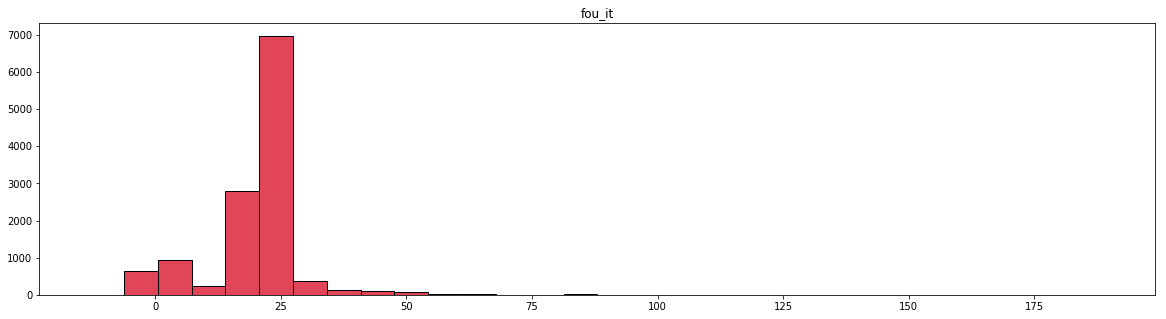

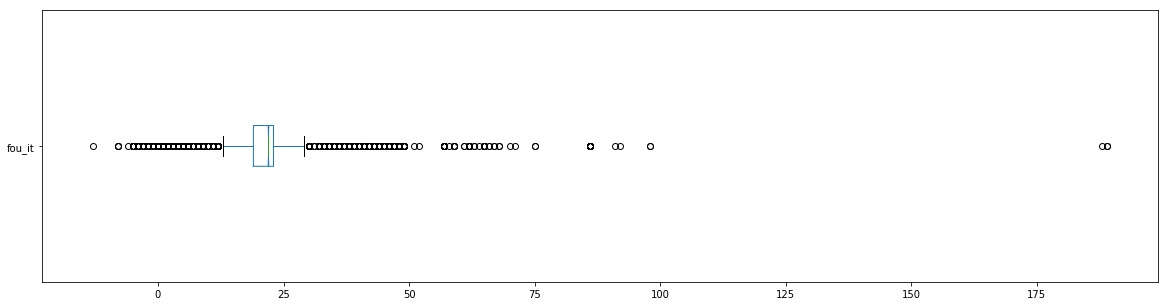

count    12342.000000
mean        19.833252
std          9.425628
min        -13.000000
25%         19.000000
50%         22.000000
75%         23.000000
max        189.000000
Name: fou_it, dtype: float64

In [83]:
pickup_merge3.hist(column="fou_it", grid=False ,figsize=(20,5),bins=30,color="#e34558",edgecolor="black")
plt.show()

pickup_merge3.boxplot(column='fou_it', notch=True, grid=False, figsize=(20,5), vert=False)

plt.show()

pickup_merge3.fou_it.describe()

In [84]:
# relation between deps and other variables

pickup_merge3.columns

Index(['Unnamed: 0', 'c note no.', 'from pincode', 'to pincode', 'from branch',
       'to branch', 'prq no', 'pickup_created_by', 'bp/captain/oa name',
       'bp captain name', 'user type', 'requested pick time (prq)',
       'pick up reached time', 'first scan location code', 'first ou in time',
       'cn creation date & time', 'cn booking date & time', 'client name',
       'client code', 'origin', 'destination', 'actual_weight',
       'vehicle_number', 'prs_no', 'consignor_name', 'consignee_name',
       'consigner_address', 'consignee_address', 'date', 'prs_totalweight',
       'cn', 'deps type', 'bucketing', 'responsible person', 'deps reason',
       'deps sub_reason', 'type of material', 'type of packaging', 'damage',
       'vehicletype', 'rqt_rt', 'fou_it'],
      dtype='object')

In [85]:
#ppm values

((pickup_merge3[pickup_merge3.damage>0]['damage'].count())/len(pickup_merge3))*1000000

1364.4754795729993

In [86]:
#convert yes deps to 2 and deps not yet confirmed to 1

pickup_merge3.loc[pickup_merge3.damage==0,'damage']=1
pickup_merge3.loc[pickup_merge3.damage==1,'damage']=2
pickup_merge3.loc[pickup_merge3.damage==0,'damage']=''


In [92]:
pickup_merge3.bucketing.unique()

array([nan, 'LH_In_transit', 'First_Mile', 'Last_Mile'], dtype=object)

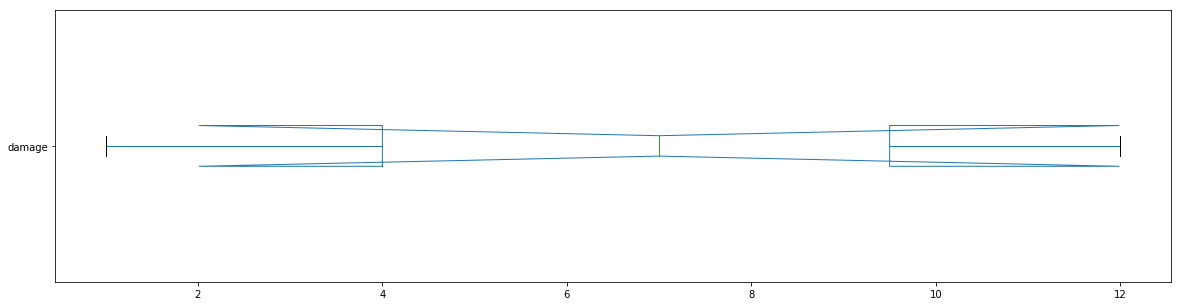

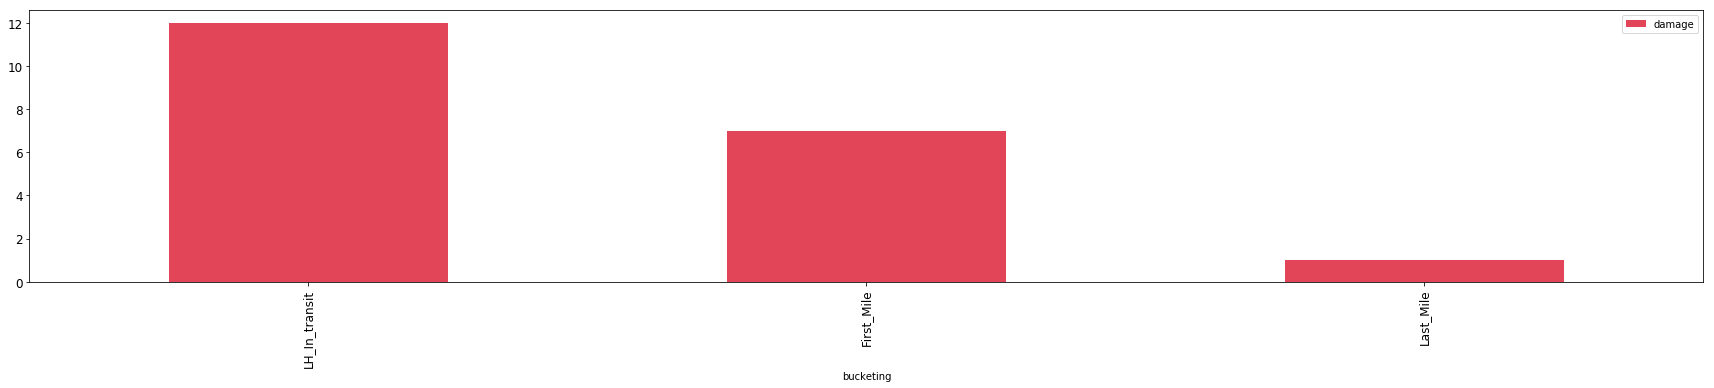

,damage
count,3.000000
mean,6.666667
std,5.507571
min,1.000000
25%,4.000000
50%,7.000000
75%,9.500000
max,12.000000


In [87]:
# find unique bucketing types

pickup_merge3.bucketing.unique()

df23=pickup_merge3.groupby(['bucketing']).count()['damage'].sort_values(ascending=False)
df23=df23.to_frame(name=None)

df23.boxplot(column='damage', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()

df23[df23['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df23.describe()


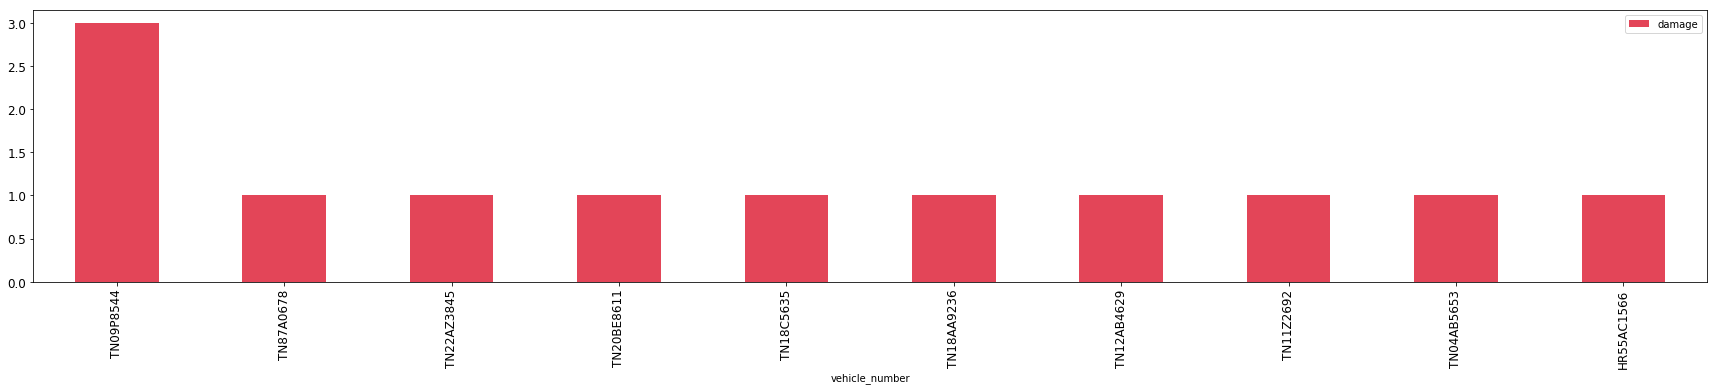

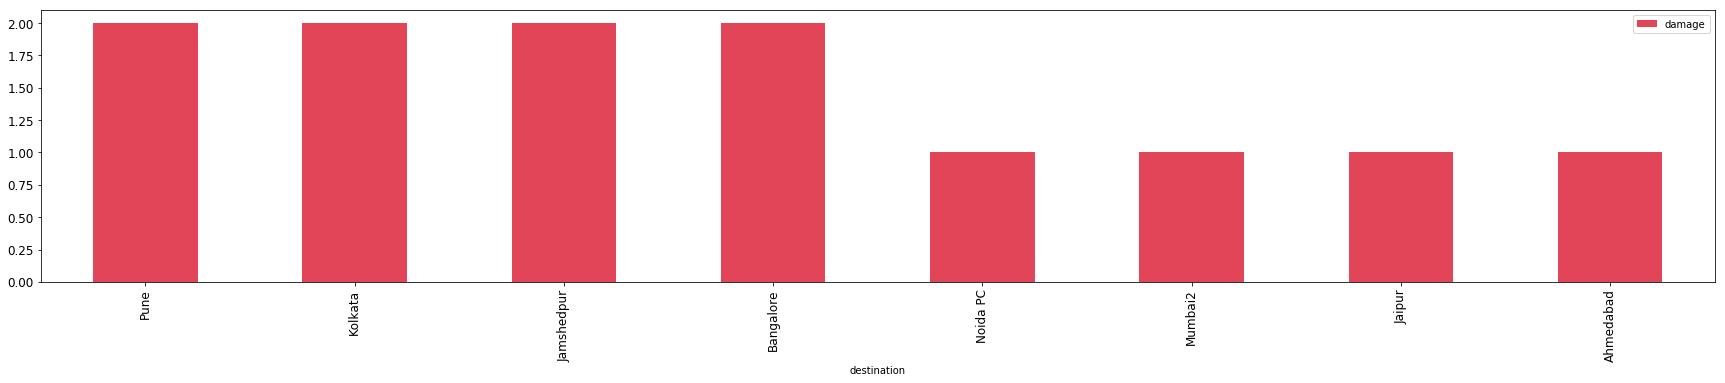

In [103]:
#in transit can be related iwth vehicle number

#first mile can be related with bpcaptain

#last mile can be related with delivery bp captain

df24=pickup_merge3[pickup_merge3.bucketing=='LH_In_transit'].groupby('vehicle_number').count()['damage'].sort_values(ascending=False)
df24=df24.to_frame(name=None)

df24.plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

#relation between deps and destination

df244=pickup_merge3[pickup_merge3.bucketing=='LH_In_transit'].groupby('destination').count()['damage'].sort_values(ascending=False)
df244=df244.to_frame(name=None)

df244.plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

# the same relation ppm

df


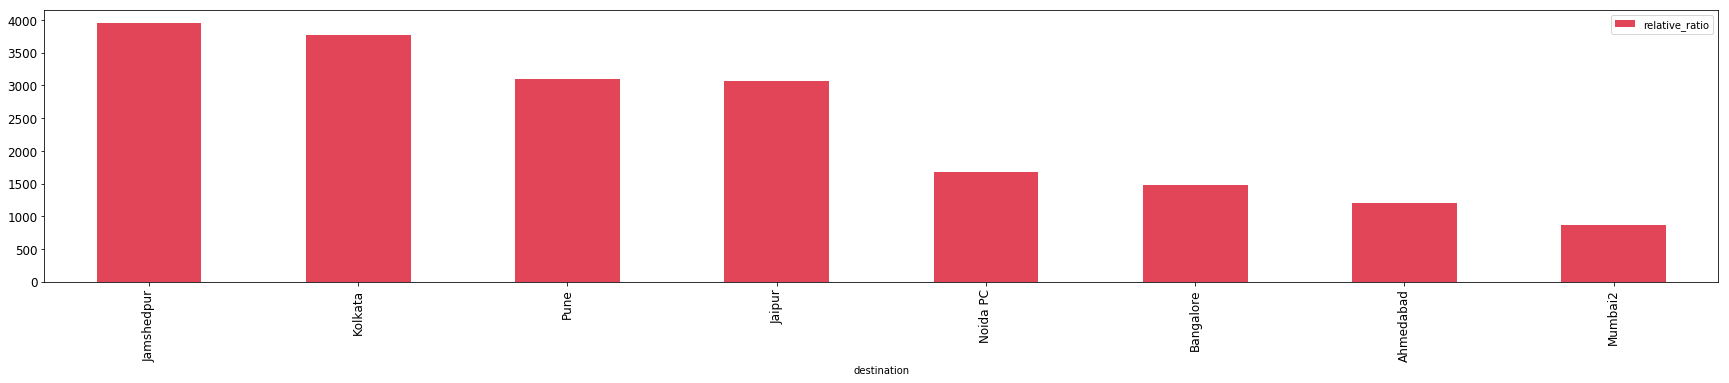

In [119]:
dfm1=pd.merge(df244,df55, how='left', on=['destination'])

dfm1['relative_ratio']=''
dfm1['relative_ratio']=(dfm1['damage']/dfm1['c note no.'])*1000000
dfm1[['destination','relative_ratio']].groupby('destination').mean().sort_values(by='relative_ratio',ascending=False).plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)

,destination,damage,c note no.,relative_ratio
0,Pune,2,647,3091.190108
1,Kolkata,2,531,3766.478343
2,Jamshedpur,2,506,3952.569170
3,Bangalore,2,1350,1481.481481
4,Noida PC,1,596,1677.852349
5,Mumbai2,1,1146,872.600349
6,Jaipur,1,326,3067.484663
7,Ahmedabad,1,825,1212.121212


In [ ]:

df22=pickup_merge3.groupby(['']).mean()['fou_it'].sort_values(ascending=False)
df22=df22.to_frame(name=None)

df22.boxplot(column='fou_it', notch=True, grid=False, figsize=(20,5), vert=False)
plt.show()

df22.describe()


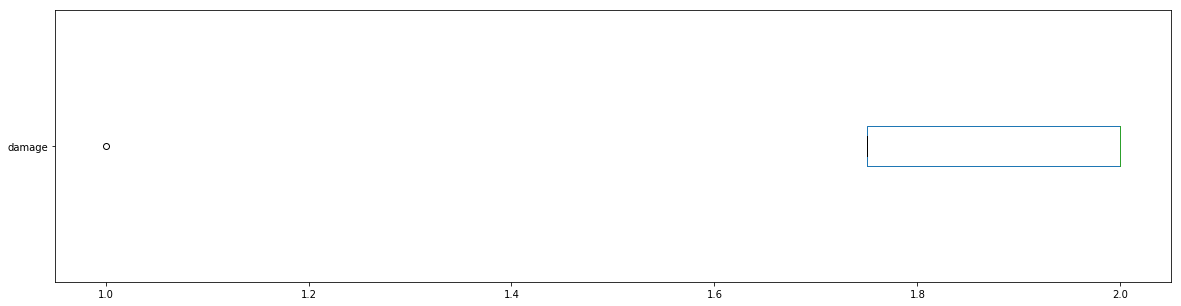

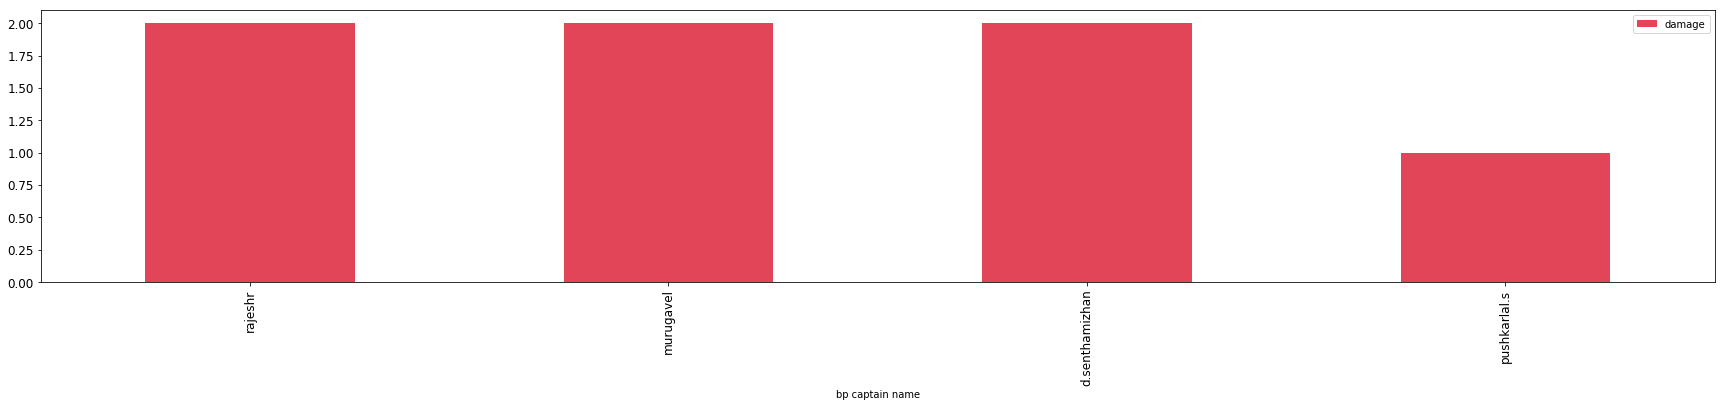

,damage
count,4.00
mean,1.75
std,0.50
min,1.00
25%,1.75
50%,2.00
75%,2.00
max,2.00


In [95]:
# relation between bp_captain and first mile 

df25=pickup_merge3[pickup_merge3.bucketing=='First_Mile'].groupby(['bp captain name']).count()['damage'].sort_values(ascending=False)
df25=df25.to_frame(name=None)

df25.boxplot(column='damage', grid=False, figsize=(20,5), vert=False)
plt.show()

df25[df25['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df25.describe()


In [2]:
#pickup_merge3.to_csv('rivigo_major.csv')
pickup_merge3=pd.read_csv('rivigo_major.csv')

In [102]:
pickup_merge3[['requested pick time (prq)',
       'pick up reached time',
       'cn creation date & time', 'cn booking date & time','first ou in time']].head(10)

,requested pick time (prq),pick up reached time,cn creation date & time,cn booking date & time,first ou in time
0,2019-01-31,2019-01-31 22:54:00,2019-02-01 00:34,2019-02-01 00:34,2019-02-01 08:37:29.600
1,2019-01-31,2019-01-31 22:54:00,2019-02-01 00:53,2019-02-01 00:53,2019-02-01 08:00:50.600
2,2019-01-31,2019-01-31 22:54:00,2019-02-01 00:54,2019-02-01 00:54,2019-02-01 08:24:10.500
3,2019-01-31,2019-01-31 22:54:00,2019-02-01 00:55,2019-02-01 00:55,2019-02-01 08:28:30.600
4,2019-01-31,2019-01-31 22:54:00,2019-02-01 00:56,2019-02-01 00:56,2019-02-01 07:17:11.100
5,2019-01-31,2019-01-31 22:54:00,2019-02-01 00:59,2019-02-01 00:59,2019-02-01 08:11:10.500
6,2019-01-31,2019-01-31 22:54:00,2019-02-01 01:00,2019-02-01 01:00,2019-02-01 08:16:10.600
7,2019-01-31,2019-01-31 22:54:00,2019-02-01 01:01,2019-02-01 01:01,2019-02-01 07:17:50.600
8,2019-02-01,2019-02-01 01:58:00,2019-02-01 01:59,2019-02-01 01:58,2019-02-01 03:54:43.000
9,2019-02-01,2019-02-01 01:58:00,2019-02-01 02:01,2019-02-01 01:59,2019-02-01 03:52:43.100


In [120]:
pickup_merge3.columns

Index(['Unnamed: 0', 'c note no.', 'from pincode', 'to pincode', 'from branch',
       'to branch', 'prq no', 'pickup_created_by', 'bp/captain/oa name',
       'bp captain name', 'user type', 'requested pick time (prq)',
       'pick up reached time', 'first scan location code', 'first ou in time',
       'cn creation date & time', 'cn booking date & time', 'client name',
       'client code', 'origin', 'destination', 'actual_weight',
       'vehicle_number', 'prs_no', 'consignor_name', 'consignee_name',
       'consigner_address', 'consignee_address', 'date', 'prs_totalweight',
       'cn', 'deps type', 'bucketing', 'responsible person', 'deps reason',
       'deps sub_reason', 'type of material', 'type of packaging', 'damage',
       'vehicletype', 'rqt_rt', 'fou_it'],
      dtype='object')

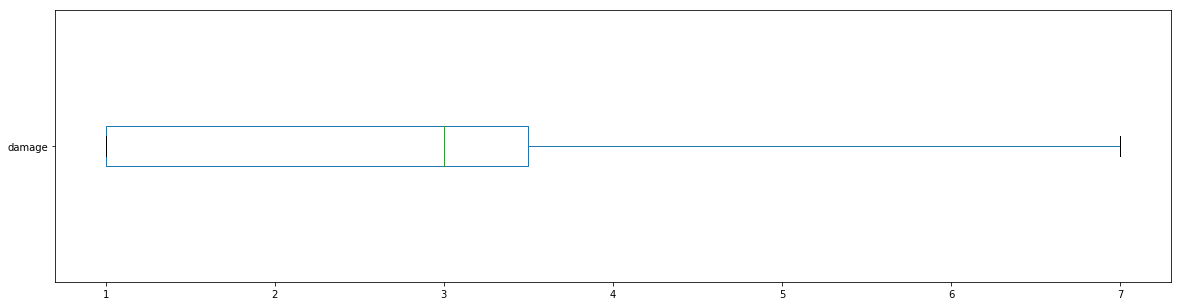

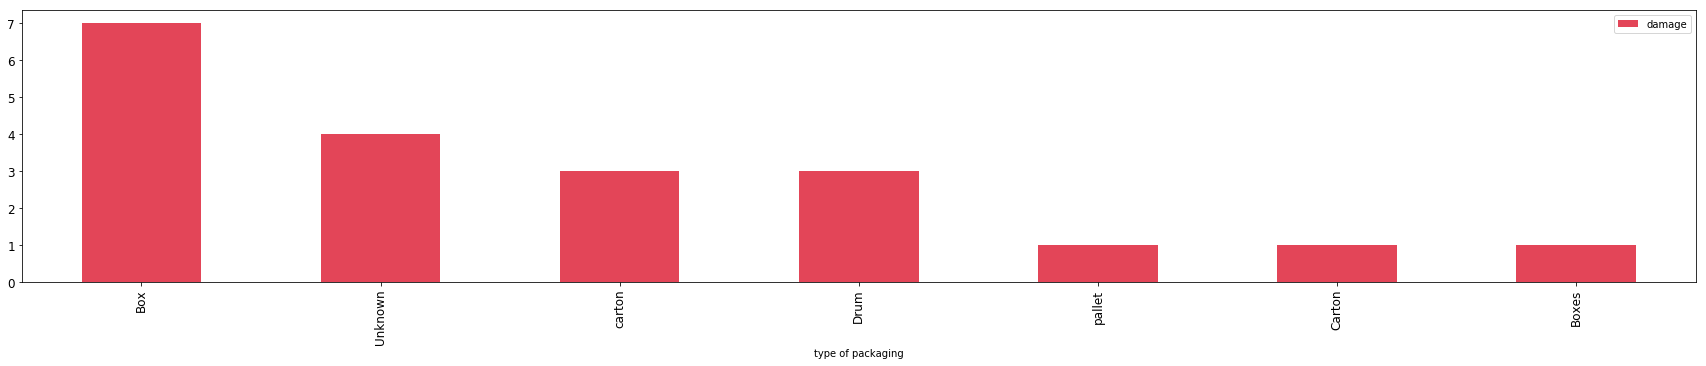

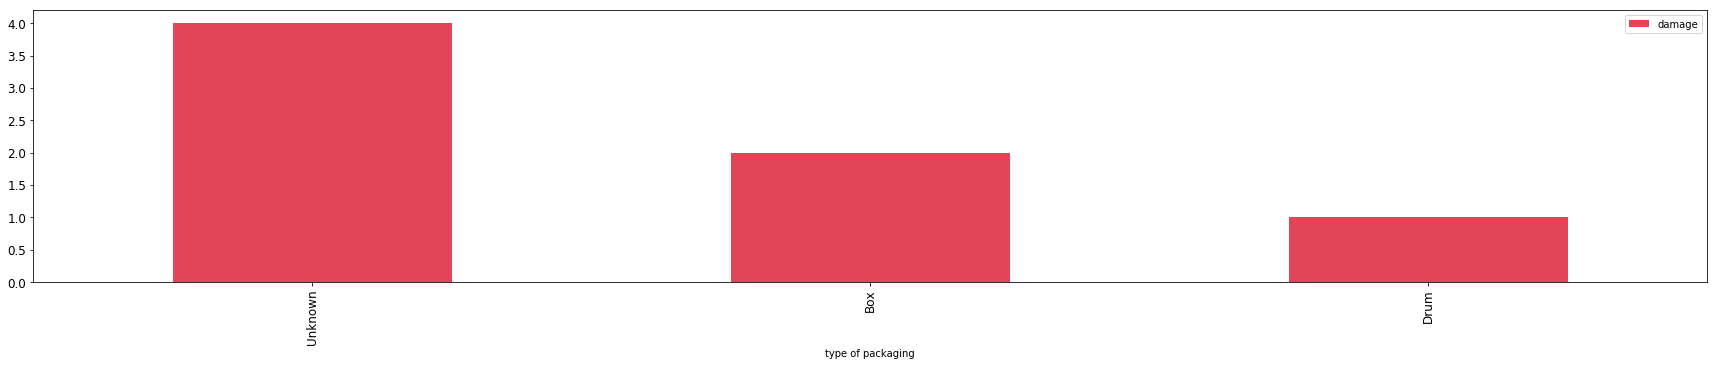

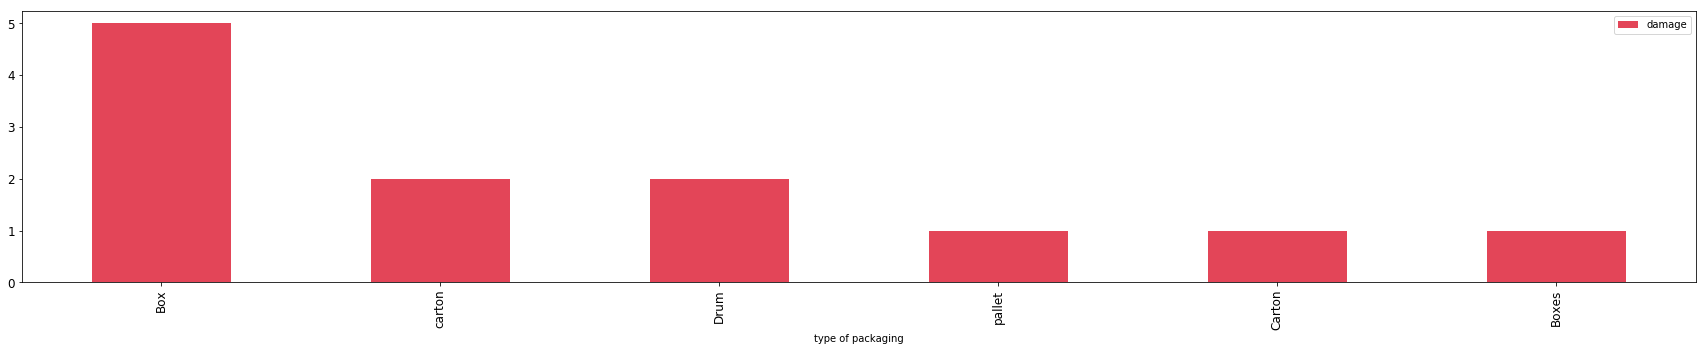

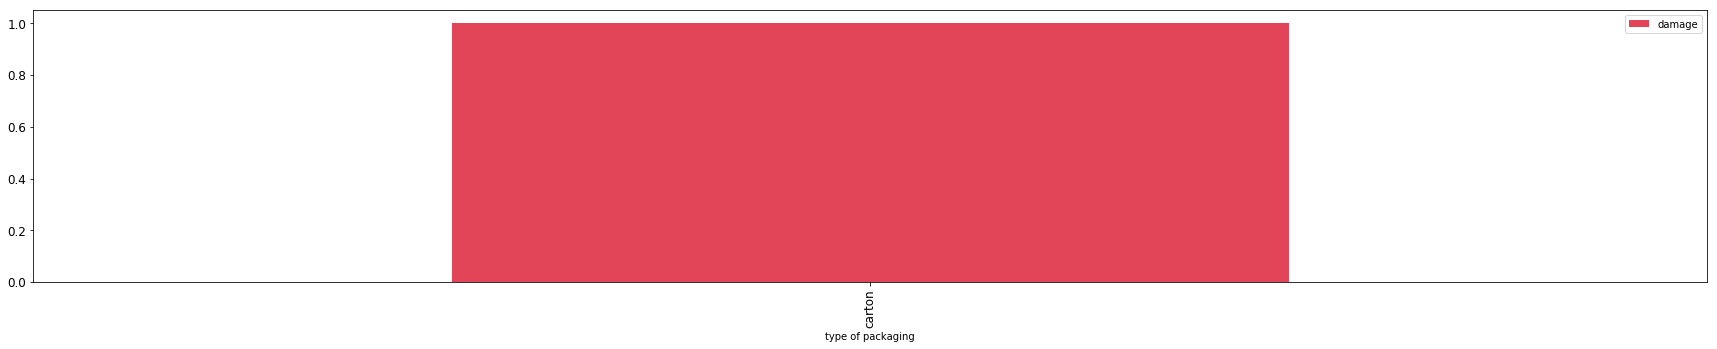

,damage
count,1.0
mean,1.0
std,NaN
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [123]:
# relation between deps and type of packaging and type of material

df26=pickup_merge3.groupby(['type of packaging']).count()['damage'].sort_values(ascending=False)
df26=df26.to_frame(name=None)

df26.boxplot(column='damage', grid=False, figsize=(20,5), vert=False)
plt.show()

df26[df26['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df26.describe()

df266=pickup_merge3[pickup_merge3.bucketing=='First_Mile'].groupby(['type of packaging']).count()['damage'].sort_values(ascending=False)
df266=df266.to_frame(name=None)

df266[df266['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df266.describe()


df267=pickup_merge3[pickup_merge3.bucketing=='LH_In_transit'].groupby(['type of packaging']).count()['damage'].sort_values(ascending=False)
df267=df267.to_frame(name=None)

df267[df267['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df267.describe()

df268=pickup_merge3[pickup_merge3.bucketing=='Last_Mile'].groupby(['type of packaging']).count()['damage'].sort_values(ascending=False)
df268=df268.to_frame(name=None)

df268[df268['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df268.describe()


#'LH_In_transit', 'First_Mile', 'Last_Mile']

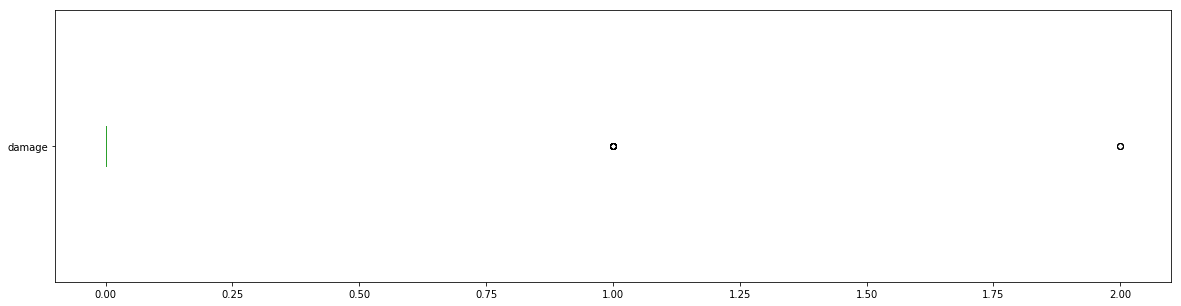

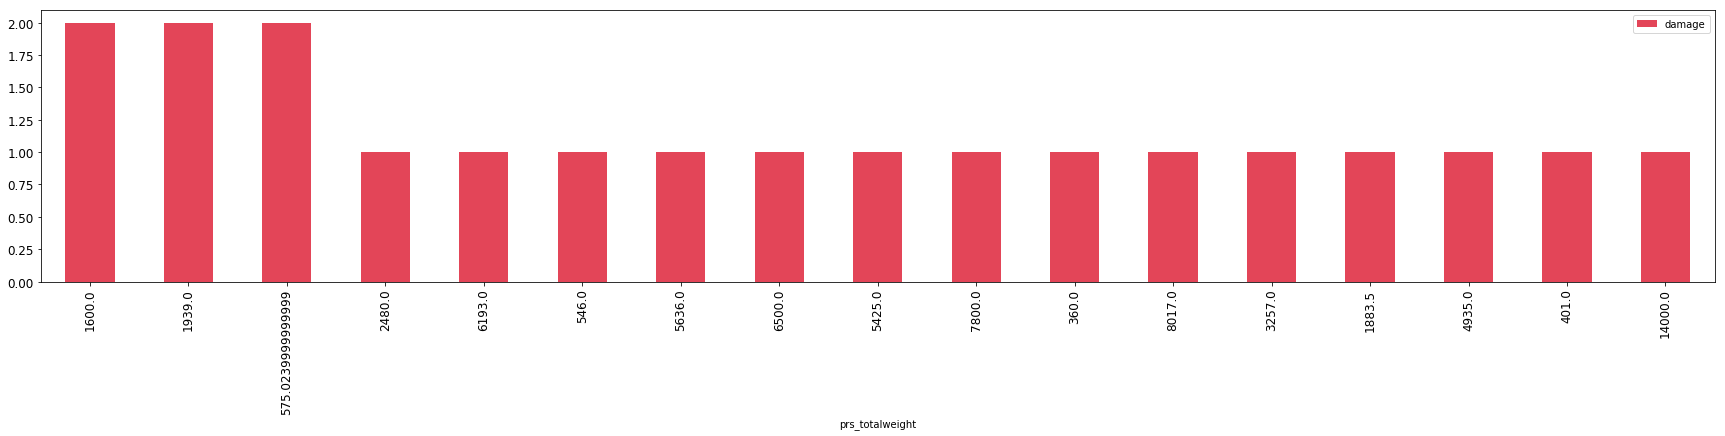

,damage
count,1125.000000
mean,0.017778
std,0.151047
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [125]:
# relation between deps and prs_totalweight

df27=pickup_merge3.groupby(['prs_totalweight']).count()['damage'].sort_values(ascending=False)
df27=df27.to_frame(name=None)

df27.boxplot(column='damage', grid=False, figsize=(20,5), vert=False)
plt.show()

df27[df27['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df27.describe()


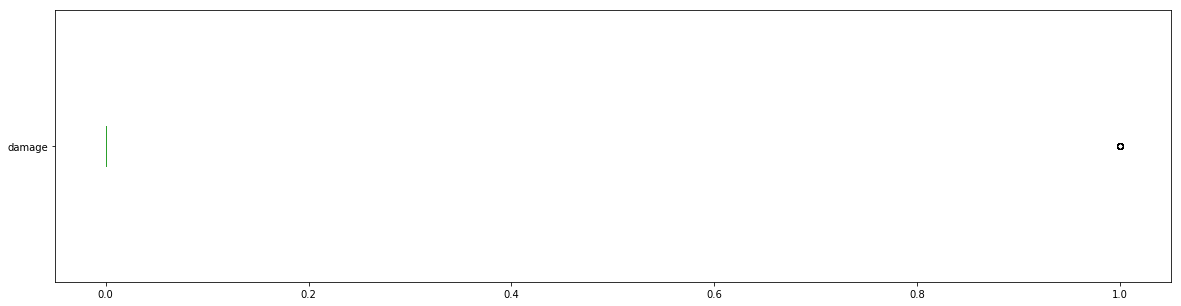

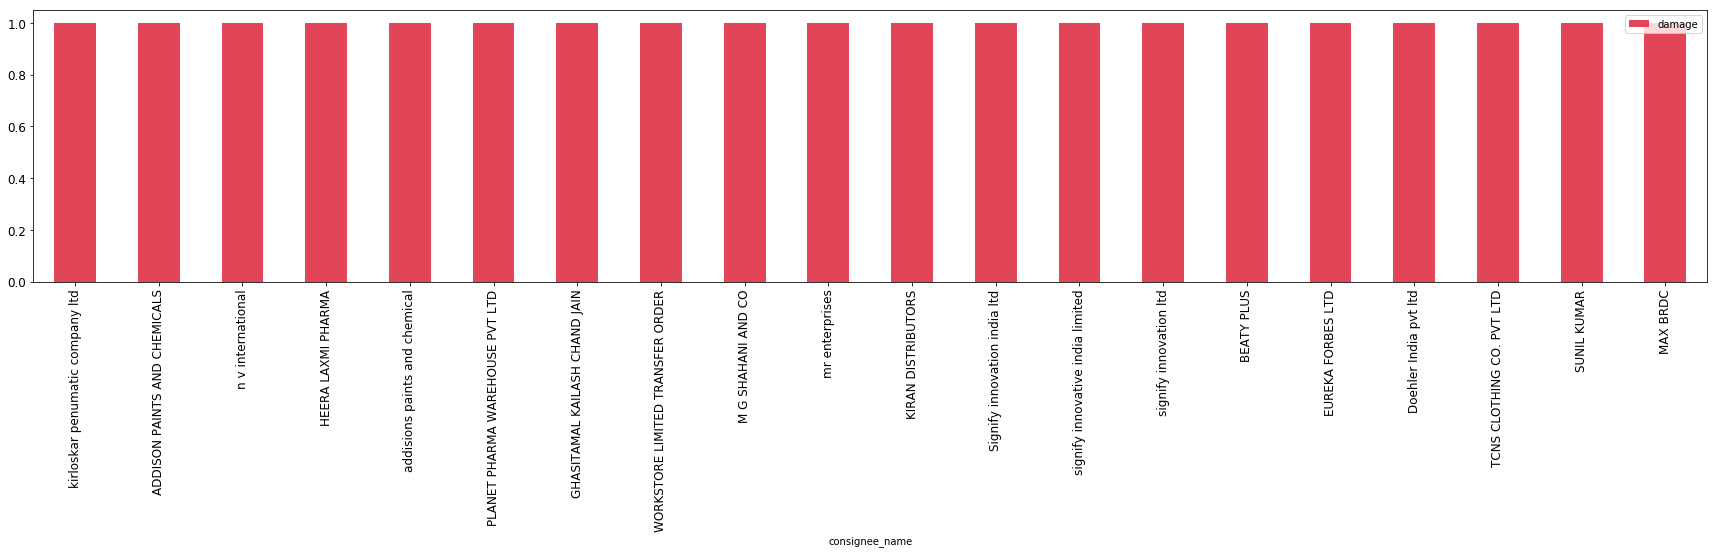

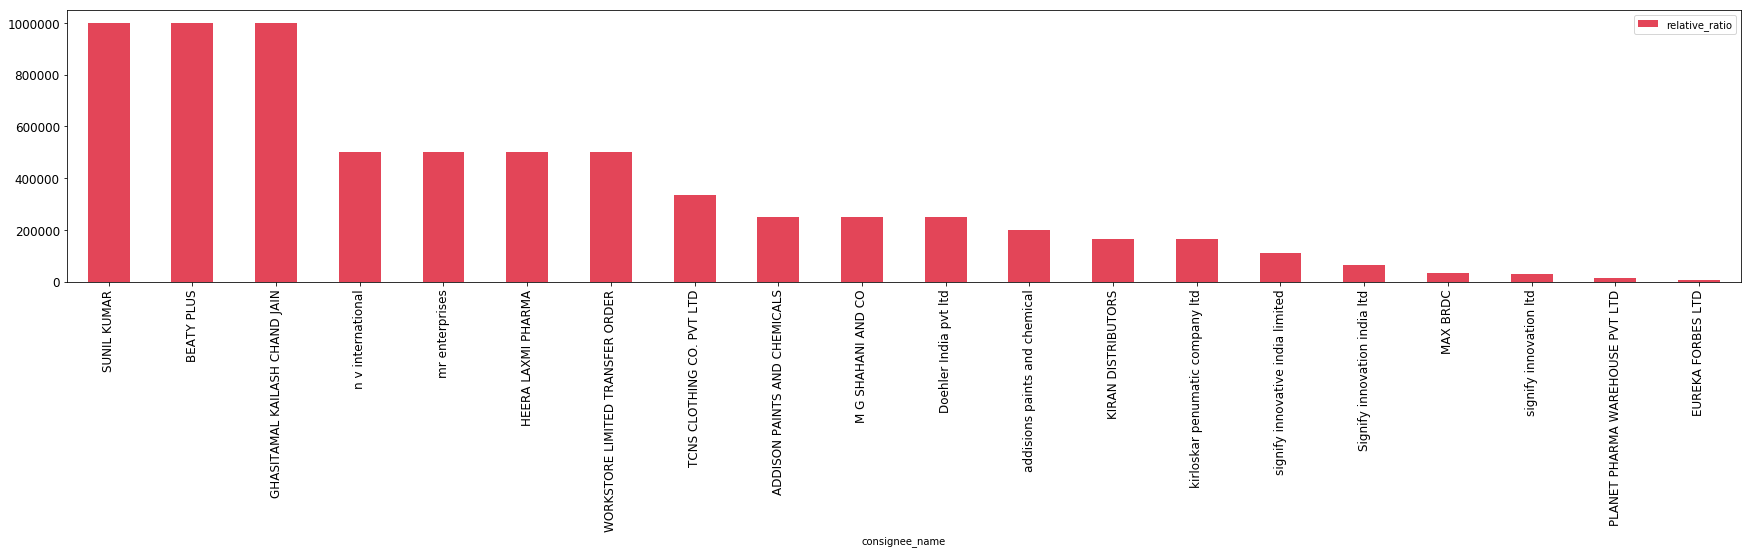

In [8]:
# relation between deps and consignee name in relative terms
# relation between deps and client name in relative terms
import matplotlib.pyplot as plt


df26=pickup_merge3.groupby(['consignee_name']).count()['damage'].sort_values(ascending=False)
df26=df26.to_frame(name=None)

df26.boxplot(column='damage', grid=False, figsize=(20,5), vert=False)
plt.show()

df26[df26['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df26.describe()


df27=pickup_merge3.groupby(['consignee_name'],as_index=False).count()[['consignee_name','c note no.']]

dfm2=pd.merge(df26,df27, how='left', on=['consignee_name'])

dfm2

dfm2['relative_ratio']=''
dfm2['relative_ratio']=(dfm2['damage']/dfm2['c note no.'])*1000000

dfm2[dfm2['relative_ratio']>1][['consignee_name','relative_ratio']].groupby('consignee_name').max().sort_values(by='relative_ratio',ascending=False).plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)

plt.show()

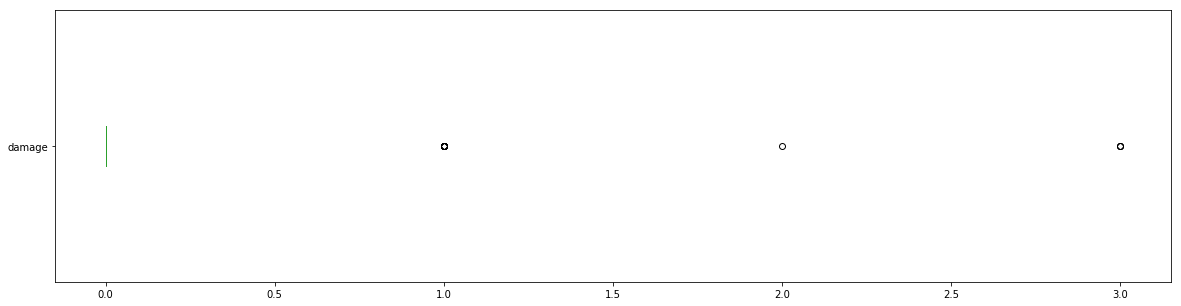

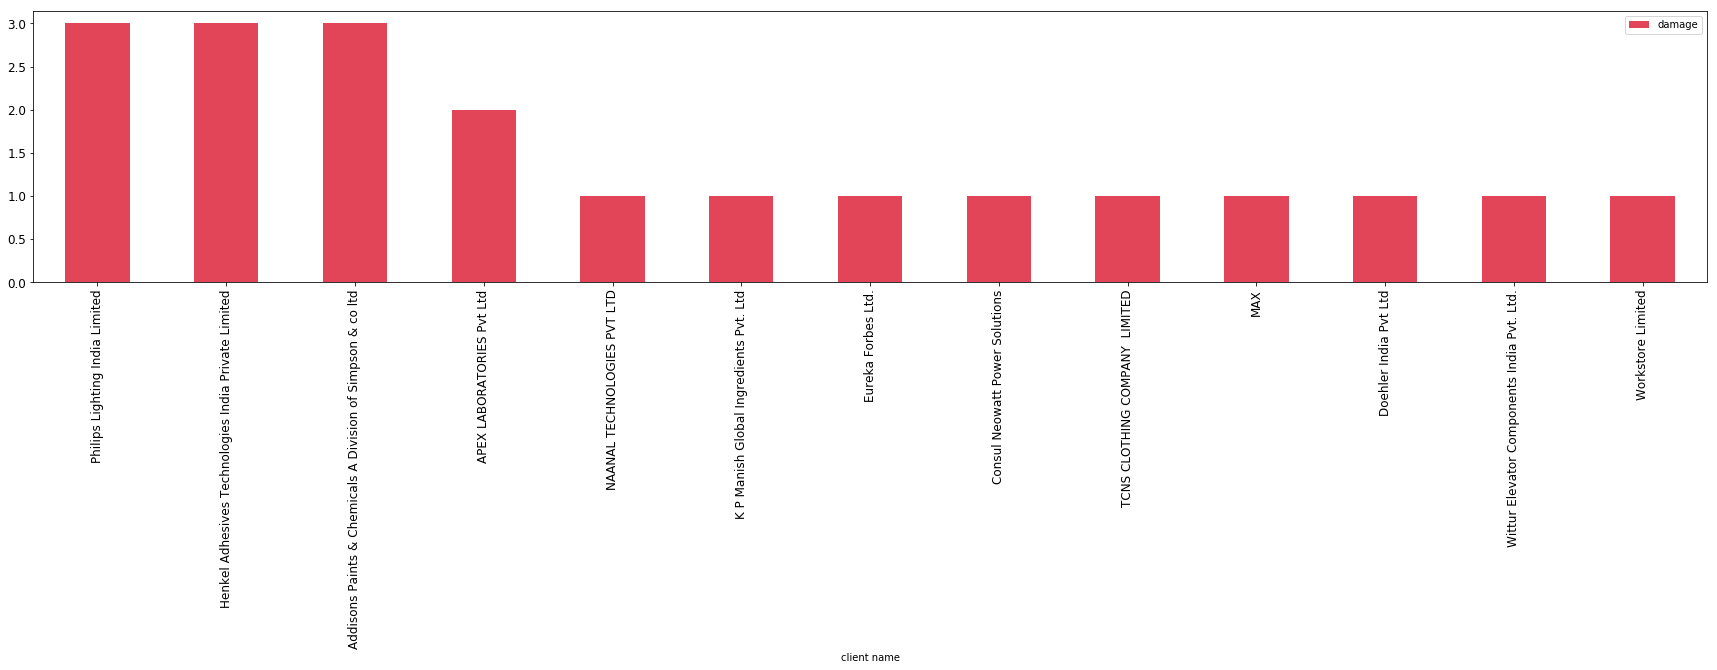

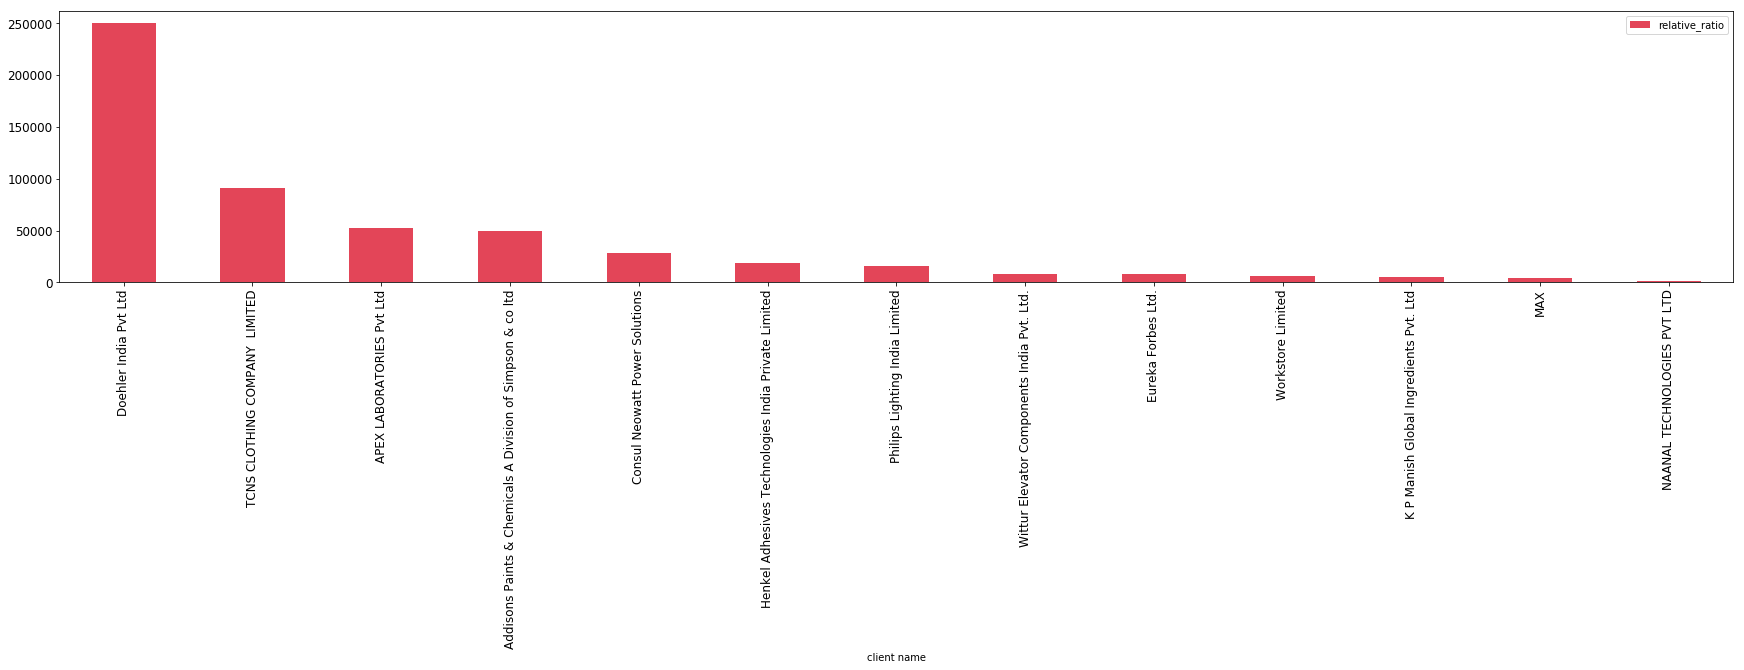

In [10]:
# deps vs client

import matplotlib.pyplot as plt


df26=pickup_merge3.groupby(['client name']).count()['damage'].sort_values(ascending=False)
df26=df26.to_frame(name=None)

df26.boxplot(column='damage', grid=False, figsize=(20,5), vert=False)
plt.show()

df26[df26['damage']>0].plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)
plt.show()

df26.describe()


df27=pickup_merge3.groupby(['client name'],as_index=False).count()[['client name','c note no.']]

dfm2=pd.merge(df26,df27, how='left', on=['client name'])

dfm2

dfm2['relative_ratio']=''
dfm2['relative_ratio']=(dfm2['damage']/dfm2['c note no.'])*1000000

dfm2[dfm2['relative_ratio']>1][['client name','relative_ratio']].groupby('client name').max().sort_values(by='relative_ratio',ascending=False).plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)

plt.show()

In [ ]:
dfm1=pd.merge(df244,df55, how='left', on=['destination'])

dfm1['relative_ratio']=''
dfm1['relative_ratio']=(dfm1['damage']/dfm1['c note no.'])*1000000
dfm1[['destination','relative_ratio']].groupby('destination').mean().sort_values(by='relative_ratio',ascending=False).plot(kind="bar",figsize=(30,5),color="#e34558",fontsize=12)

In [136]:
df55

,destination,c note no.
2,Bangalore,1350
9,Hyderabad,1251
7,Delhi,1159
15,Mumbai2,1146
5,Coimbatore,1001
0,Ahmedabad,825
18,Pune,647
1,Ambala,639
17,Noida PC,596
13,Kolkata,531


In [ ]:
"""
from string import ascii_lowercase
import numpy as np
import sklearn.cluster
import distance

#words = ["bajrangtrading", "citytarpaulins", "sathyaagencies", "tajtarpaulin"]
words = np.asarray(words) #So that indexing with a list will work
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))

import sys
!{sys.executable} -m pip install distance
"""

In [126]:
pickup_merge3.columns


Index(['Unnamed: 0', 'c note no.', 'from pincode', 'to pincode', 'from branch',
       'to branch', 'prq no', 'pickup_created_by', 'bp/captain/oa name',
       'bp captain name', 'user type', 'requested pick time (prq)',
       'pick up reached time', 'first scan location code', 'first ou in time',
       'cn creation date & time', 'cn booking date & time', 'client name',
       'client code', 'origin', 'destination', 'actual_weight',
       'vehicle_number', 'prs_no', 'consignor_name', 'consignee_name',
       'consigner_address', 'consignee_address', 'date', 'prs_totalweight',
       'cn', 'deps type', 'bucketing', 'responsible person', 'deps reason',
       'deps sub_reason', 'type of material', 'type of packaging', 'damage',
       'vehicletype', 'rqt_rt', 'fou_it'],
      dtype='object')